# Inspection of the datasets

In [ ]:
# Import necessary libraries
# For data analysis and manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from scipy.stats import randint

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To filter unnecessary warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# For feature selection
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# For model selection & hyper-parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import learning_curve

# For performance evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Load the datasets
df_amzn = pd.read_csv(r"C:\Users\KaungHtetHein\Google Drive\QUB MSc AI\ECS8051 - Machine Learning"
    r"\Machine Learning - Final Assignment Project\data\AMZN.csv")

df_fb = pd.read_csv(r"C:\Users\KaungHtetHein\Google Drive\QUB MSc AI\ECS8051 - Machine Learning"
    r"\Machine Learning - Final Assignment Project\data\FB.csv")

df_googl = pd.read_csv(r"C:\Users\KaungHtetHein\Google Drive\QUB MSc AI\ECS8051 - Machine Learning"
    r"\Machine Learning - Final Assignment Project\data\GOOGL.csv")

df_ibm = pd.read_csv(r"C:\Users\KaungHtetHein\Google Drive\QUB MSc AI\ECS8051 - Machine Learning"
    r"\Machine Learning - Final Assignment Project\data\IBM.csv")

df_msft = pd.read_csv(r"C:\Users\KaungHtetHein\Google Drive\QUB MSc AI\ECS8051 - Machine Learning"
    r"\Machine Learning - Final Assignment Project\data\MSFT.csv")

In [ ]:
# Shapes of the datasets
print("AMZN", df_amzn.shape)
print("FB", df_fb.shape)
print("GOOGL", df_googl.shape)
print("IBM", df_ibm.shape)
print("MSFT", df_msft.shape)

AMZN (2473, 64)
FB (1215, 64)
GOOGL (3229, 64)
IBM (4988, 64)
MSFT (3732, 64)


# AMZN.csv

In [ ]:
# Preview the dataset
df_amzn

Date     Open     High      Low  Close(t)    Volume       SD20  \
0     18/10/2010   165.00   165.19   161.82    163.56   6331300   3.770297   
1     19/10/2010   160.68   162.80   157.00    158.67   7525000   3.501162   
2     20/10/2010   158.78   159.87   156.57    158.67   5790400   3.271424   
3     21/10/2010   162.67   166.13   161.29    164.97  13482500   3.465530   
4     22/10/2010   162.45   170.17   162.27    169.13  16318400   4.217293   
...          ...      ...      ...      ...       ...       ...        ...   
2468  07/08/2020  3224.01  3240.81  3140.67   3167.46   3929600  80.156041   
2469  10/08/2020  3170.31  3172.51  3101.52   3148.16   3167300  81.245329   
2470  11/08/2020  3113.20  3159.22  3073.00   3080.67   3718100  81.260306   
2471  12/08/2020  3108.00  3174.39  3101.42   3162.24   3527200  80.514368   
2472  13/08/2020  3182.99  3217.52  3155.00   3161.02   3149000  78.332859   

       Upper_Band   Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0      164.383594   149.302406        164.64        155.53        155.17   
1      164.242324   150.237676        163.56        164.64        155.53   
2      164.124849   151.039151        158.67        163.56        164.64   
3      165.119061   151.256939        158.67        158.67        163.56   
4      167.042587   150.173413        164.97        158.67        158.67   
...           ...          ...           ...           ...           ...   
2468  3247.466081  2926.841919       3225.00       3205.03       3138.83   
2469  3251.852657  2926.871343       3167.46       3225.00       3205.03   
2470  3251.716113  2926.674887       3148.16       3167.46       3225.00   
2471  3257.892736  2935.835264       3080.67       3148.16       3167.46   
2472  3261.585717  2948.254283       3162.24       3080.67       3148.16   

      S_Close(t-5)  S_Open(t-1)       MA5      MA10       MA20       MA50  \
0           153.03       158.42   159.076   157.650   156.8430   142.8106   
1           156.48       165.00   159.514   157.430   157.2400   143.4074   
2           155.17       160.68   160.214   157.757   157.5820   143.9808   
3           155.53       158.78   162.102   158.627   158.1880   144.7624   
4           164.64       162.67   163.000   159.985   158.6080   145.6138   
...            ...          ...       ...       ...        ...        ...   
2468       3164.68      3194.36  3169.642  3115.384  3087.1540  2859.4670   
2469       3111.89      3224.01  3176.896  3124.679  3089.3620  2873.5828   
2470       3138.83      3170.31  3165.264  3132.713  3089.1955  2885.7754   
2471       3205.03      3113.20  3156.706  3145.584  3096.8640  2899.5720   
2472       3225.00      3108.00  3143.910  3156.498  3104.9200  2913.2244   

           MA200        EMA10        EMA20        EMA50       EMA100  \
0      130.50000   160.215595   160.215595   160.215595   160.215595   
1      130.62385   159.700397   159.700397   159.700397   159.700397   
2      130.74375   159.356931   159.356931   159.356931   159.356931   
3      130.90735   161.227954   161.227954   161.227954   161.227954   
4      131.10300   163.861969   163.861969   163.861969   163.861969   
...          ...          ...          ...          ...          ...   
2468  2203.11225  3167.913902  3167.913902  3167.913902  3167.913902   
2469  2210.04220  3161.329268  3161.329268  3161.329268  3161.329268   
2470  2216.54165  3134.442846  3134.442846  3134.442846  3134.442846   
2471  2223.54620  3143.708564  3143.708564  3143.708564  3143.708564   
2472  2230.46590  3149.479042  3149.479042  3149.479042  3149.479042   

           EMA200       MACD   MACD_EMA         ATR        ADX          CCI  \
0      160.215595   4.679087   4.963021    4.431468  32.445714  1333.333333   
1      159.700397   4.407798   4.851976    4.583506  31.255258  1333.333333   
2      159.356931   4.145019   4.710585    4.491827  30.021764  1333.333333   
3      161.227954   4.394465   4.647361    4.703839  30.

# FB.csv

In [ ]:
# Preview the dataset
df_fb

Date    Open    High     Low  Close(t)    Volume       SD20  \
0     2015-10-16   96.18   97.59   95.35     97.54  25412900   2.446186   
1     2015-10-19   97.18   98.57   96.92     98.47  23729900   2.684070   
2     2015-10-20   98.73   99.59   96.56     97.00  30881800   2.820542   
3     2015-10-21   97.37   98.18   96.47     97.11  21917800   2.943654   
4     2015-10-22   97.79   99.73   97.55     99.67  26392100   3.250863   
...          ...     ...     ...     ...       ...       ...        ...   
1210  2020-08-07  264.08  278.89  263.43    268.44  72735500  10.662367   
1211  2020-08-10  268.04  273.86  259.69    263.00  30248800  11.494537   
1212  2020-08-11  260.19  265.92  255.13    256.13  28238300  11.733735   
1213  2020-08-12  258.97  263.90  258.11    259.89  21428300  12.120819   
1214  2020-08-13  261.55  265.16  259.57    261.30  17374000  12.512843   

      Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0      97.858871   88.074129         95.96         94.07         94.12   
1      98.480639   87.744361         97.54         95.96         94.07   
2      98.955584   87.673416         98.47         97.54         95.96   
3      99.358808   87.584192         97.00         98.47         97.54   
4     100.236226   87.232774         97.11         97.00         98.47   
...          ...         ...           ...           ...           ...   
1210  264.426234  221.776766        265.28        249.12        249.83   
1211  267.290574  221.312426        268.44        265.28        249.12   
1212  268.588969  221.654031        263.00        268.44        265.28   
1213  270.343638  221.860362        256.13        263.00        268.44   
1214  272.146187  222.094813        259.89        256.13        263.00   

      S_Close(t-5)  S_Open(t-1)      MA5     MA10      MA20      MA50  \
0            93.24        94.99   95.190   94.087   92.9665   91.8370   
1            94.26        96.18   96.032   94.533   93.1125   91.9204   
2            94.12        97.18   96.608   94.953   93.3145   91.9774   
3            94.07        98.73   97.216   95.424   93.4715   92.0472   
4            95.96        97.37   97.958   96.144   93.7345   92.1568   
...            ...          ...      ...      ...       ...       ...   
1210        253.67       249.04  256.926  246.971  243.1015  237.5480   
1211        251.96       264.08  259.134  249.921  244.3015  238.3062   
1212        249.83       268.04  260.394  252.522  245.1215  238.7906   
1213        249.12       260.19  262.548  255.182  246.1020  239.3340   
1214        265.28       258.97  261.752  257.862  247.1205  239.9568   

          MA200       EMA10       EMA20       EMA50      EMA100      EMA200  \
0      84.60085   95.477668   95.477668   95.477668   95.477668   95.477668   
1      84.70095   96.475112   96.475112   96.475112   96.475112   96.475112   
2      84.80000   96.650074   96.650074   96.650074   96.650074   96.650074   
3      84.90480   96.803383   96.803383   96.803383   96.803383   96.803383   
4      85.02240   97.758922   97.758922   97.758922   97.758922   97.758922   
...         ...         ...         ...         ...         ...         ...   
1210  206.56655  258.259773  258.259773  258.259773  258.259773  258.259773   
1211  206.95080  259.839849  259.839849  259.839849  259.839849  259.839849   
1212  207.29955  258.603233  258.603233  258.603233  258.603233  258.603233   
1213  207.65955  259.032155  259.032155  259.032155  259.032155  259.032155   
1214  208.01905  259.788103  259.788103  259.788103  259.788103  259.788103   

          MACD  MACD_EMA       ATR        ADX          CCI        ROC  \
0     1.062872  0.584317  2.442920  11.336243  1333.333333   5.941132   
1     1.333844  0.734222  2.386283  12.008037  1333.333333   4.744176   
2     1.413678  0.870113  2.432263  13.010564  1333.333333   4.525862   
3     1.468892  0.989869  2.380673  13.884615  1333.333333   5.097403   
4     1.699627  1.131821  2.397

# GOOGL.csv

In [ ]:
# Preview the dataset
df_googl

Date     Open     High      Low  Close(t)    Volume       SD20  \
0     2007-10-17   315.54   317.32   311.11    317.06  12048900  13.498014   
1     2007-10-18   318.02   321.01   314.56    320.13  24553800  13.603549   
2     2007-10-19   327.61   329.57   321.94    322.68  31546400  13.859332   
3     2007-10-22   319.65   327.83   318.46    325.70  13315400  14.319036   
4     2007-10-23   330.96   339.14   330.33    338.22  13573800  15.652638   
...          ...      ...      ...      ...       ...       ...        ...   
3224  2020-08-07  1509.04  1520.09  1486.27   1498.37   1385900  25.922584   
3225  2020-08-10  1490.80  1507.15  1477.49   1496.82   1027300  26.255975   
3226  2020-08-11  1494.00  1510.44  1478.19   1480.54   1554900  27.298591   
3227  2020-08-12  1487.12  1511.67  1485.00   1507.24   1126600  27.308756   
3228  2020-08-13  1508.21  1536.97  1508.21   1516.65   1119400  27.320009   

       Upper_Band   Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0      323.694527   269.702473        308.31        310.37        319.01   
1      326.077599   271.663401        317.06        308.31        310.37   
2      328.706664   273.269336        320.13        317.06        308.31   
3      331.696571   274.420429        322.68        320.13        317.06   
4      337.035777   274.425223        325.70        322.68        320.13   
...           ...          ...           ...           ...           ...   
3224  1567.479668  1463.789332       1504.95       1479.09       1473.30   
3225  1567.375950  1462.352050       1498.37       1504.95       1479.09   
3226  1567.445182  1458.250818       1496.82       1498.37       1504.95   
3227  1566.983511  1457.748489       1480.54       1496.82       1498.37   
3228  1567.092517  1457.812483       1507.24       1480.54       1496.82   

      S_Close(t-5)  S_Open(t-1)       MA5      MA10       MA20       MA50  \
0           313.01       309.55   313.212   307.921   296.6985   273.7178   
1           311.31       315.54   314.976   310.954   298.8705   274.8574   
2           319.01       318.02   315.710   313.490   300.9880   276.1586   
3           310.37       327.61   318.776   315.548   303.0585   277.5100   
4           308.31       319.65   324.758   318.580   305.7305   279.1142   
...            ...          ...       ...       ...        ...        ...   
3224       1487.95      1476.15  1487.694  1502.138  1515.6345  1474.0816   
3225       1482.76      1509.04  1490.506  1498.877  1514.8640  1475.3476   
3226       1473.30      1490.80  1491.954  1496.566  1512.8480  1476.2610   
3227       1479.09      1494.00  1497.584  1494.939  1512.3660  1477.5596   
3228       1504.95      1487.12  1499.924  1492.767  1512.4525  1479.1076   

           MA200        EMA10        EMA20        EMA50       EMA100  \
0      251.26115   312.287152   312.287152   312.287152   312.287152   
1      251.69165   314.901435   314.901435   314.901435   314.901435   
2      252.09570   317.494290   317.494290   317.494290   317.494290   
3      252.50500   320.229527   320.229527   320.229527   320.229527   
4      252.98595   326.226351   326.226351   326.226351   326.226351   
...          ...          ...          ...          ...          ...   
3224  1364.12815  1495.524430  1495.524430  1495.524430  1495.524430   
3225  1365.32410  1495.956287  1495.956287  1495.956287  1495.956287   
3226  1366.43125  1490.817525  1490.817525  1490.817525  1490.817525   
3227  1367.64595  1496.291683  1496.291683  1496.291683  1496.291683   
3228  1368.78430  1503.077789  1503.077789  1503.077789  1503.077789   

           EMA200       MACD   MACD_EMA        ATR        ADX          CCI  \
0      312.287152  12.171412  11.111101   7.045269  56.476330  1333.333333   
1      314.901435  12.442187  11.377318   7.002750  57.664488  1333.333333   
2      317.494290  12.715960  11.645046   7.176839  59.106975  1333.333333   
3      320.229527  13.026455  11.921328   7.333494  59.53464

# IBM.csv

In [ ]:
# Preview the dataset
df_ibm

Date    Open    High     Low  Close(t)    Volume      SD20  \
0     2000-10-16   71.04   72.07   69.17     70.80   7710400  3.654238   
1     2000-10-17   71.32   72.55   69.17     71.99   8882500  3.430448   
2     2000-10-18   61.64   63.15   57.50     60.80  29777800  4.207529   
3     2000-10-19   62.44   62.76   59.05     61.44  17966900  4.745871   
4     2000-10-20   60.61   61.32   60.01     60.37   9369200  5.099733   
...          ...     ...     ...     ...       ...       ...       ...   
4983  2020-08-07  123.50  125.07  123.21    124.96   3651000  2.213302   
4984  2020-08-10  125.42  127.24  125.18    127.11   3968300  1.962649   
4985  2020-08-11  128.76  130.47  126.61    126.75   5001200  1.750356   
4986  2020-08-12  127.61  127.79  125.88    126.70   3530200  1.728548   
4987  2020-08-13  125.96  126.39  124.77    125.03   3171300  1.674328   

      Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0      81.314476   66.697524         69.49         65.70         71.36   
1      80.486396   66.764604         70.80         69.49         65.70   
2      81.106557   64.276443         71.99         70.80         69.49   
3      81.384743   62.401257         60.80         71.99         70.80   
4      81.164966   60.766034         61.44         60.80         71.99   
...          ...         ...           ...           ...           ...   
4983  127.627603  118.774397        124.49        123.83        124.21   
4984  127.598799  119.748201        124.96        124.49        123.83   
4985  127.559712  120.558288        127.11        124.96        124.49   
4986  127.780595  120.866405        126.75        127.11        124.96   
4987  127.803156  121.105844        126.70        126.75        127.11   

      S_Close(t-5)  S_Open(t-1)      MA5     MA10      MA20      MA50  \
0            75.14        66.38   70.108   71.501   74.0060   77.5484   
1            73.19        71.04   69.868   71.656   73.6255   77.5078   
2            71.36        71.32   67.756   70.449   72.6915   77.2090   
3            65.70        61.64   66.904   69.382   71.8930   76.9246   
4            69.49        62.44   65.080   68.028   70.9655   76.6062   
...            ...          ...      ...      ...       ...       ...   
4983        121.35       123.38  124.038  123.399  123.2010  121.9730   
4984        122.70       123.50  124.920  123.652  123.6735  122.0494   
4985        124.21       125.42  125.428  124.041  124.0590  122.1188   
4986        123.83       128.76  126.002  124.341  124.3235  122.1654   
4987        124.49       127.61  126.110  124.713  124.4545  122.1184   

          MA200       EMA10       EMA20       EMA50      EMA100      EMA200  \
0      72.92195   70.363441   70.363441   70.363441   70.363441   70.363441   
1      72.91360   70.905628   70.905628   70.905628   70.905628   70.905628   
2      72.86180   67.537085   67.537085   67.537085   67.537085   67.537085   
3      72.80070   65.504723   65.504723   65.504723   65.504723   65.504723   
4      72.74060   63.793149   63.793149   63.793149   63.793149   63.793149   
...         ...         ...         ...         ...         ...         ...   
4983  124.82350  124.138418  124.138418  124.138418  124.138418  124.138418   
4984  124.81895  125.128945  125.128945  125.128945  125.128945  125.128945   
4985  124.81405  125.669297  125.669297  125.669297  125.669297  125.669297   
4986  124.80240  126.012864  126.012864  126.012864  126.012864  126.012864   
4987  124.77985  125.685243  125.685243  125.685243  125.685243  125.685243   

          MACD  MACD_EMA       ATR        ADX          CCI        ROC  \
0    -2.295006 -1.859571  3.453274  28.945704  1333.333333  -5.675460   
1    -2.124123 -1.912481  3.448041  28.724313  1333.333333   2.200454   
2    -2.858685 -2.101722  4.236752  30.684559  1333.333333 -16.563744   
3    -3.350564 -2.351490  4.199127  32.504787  1333.333333 -14.796838   
4    -3.783112 -2.637815  4.001332  34.1949

# MSFT.csv

In [ ]:
# Preview the dataset
df_msft

Date    Open    High     Low  Close(t)    Volume      SD20  \
0     2005-10-17   17.97   17.98   17.80     17.86  46924400  0.384549   
1     2005-10-18   17.83   18.08   17.80     17.89  69328200  0.368394   
2     2005-10-19   17.88   18.27   17.84     18.27  66574500  0.359387   
3     2005-10-20   18.24   18.30   18.02     18.05  58830600  0.355440   
4     2005-10-21   18.14   18.21   17.89     18.05  69431200  0.352278   
...          ...     ...     ...     ...       ...       ...       ...   
3727  2020-08-07  214.85  215.70  210.93    212.48  27789600  4.893286   
3728  2020-08-10  211.67  211.88  206.35    208.25  36716500  4.890728   
3729  2020-08-11  207.16  207.65  203.14    203.38  36446500  4.991406   
3730  2020-08-12  205.29  210.28  204.75    209.19  28041400  5.002837   
3731  2020-08-13  209.44  211.35  208.15    208.70  22588900  4.926344   

      Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0      19.023098   17.484902         17.97         17.91         17.70   
1      18.944289   17.470711         17.86         17.97         17.91   
2      18.911774   17.474226         17.89         17.86         17.97   
3      18.883881   17.462119         18.27         17.89         17.86   
4      18.860056   17.450944         18.05         18.27         17.89   
...          ...         ...           ...           ...           ...   
3727  217.618572  198.045428        216.35        212.94        213.29   
3728  217.672456  198.109544        212.48        216.35        212.94   
3729  217.625312  197.659688        208.25        212.48        216.35   
3730  217.705674  197.694326        203.38        208.25        212.48   
3731  217.791687  198.086313        209.19        203.38        208.25   

      S_Close(t-5)  S_Open(t-1)      MA5     MA10      MA20      MA50  \
0            17.81        17.99   17.844   17.911   18.2540   19.0262   
1            17.78        17.97   17.866   17.881   18.2075   18.9900   
2            17.70        17.83   17.980   17.911   18.1930   18.9582   
3            17.91        17.88   18.008   17.915   18.1730   18.9278   
4            17.97        18.24   18.024   17.929   18.1555   18.8928   
...            ...          ...      ...      ...       ...       ...   
3727        205.01       212.34  214.320  209.044  207.8320  201.0002   
3728        216.54       214.85  212.662  209.484  207.8910  201.5002   
3729        213.29       211.67  210.680  209.620  207.6425  201.9112   
3730        212.94       207.16  209.930  210.133  207.7000  202.3968   
3731        216.35       205.29  208.400  210.613  207.9390  202.8636   

          MA200       EMA10       EMA20       EMA50      EMA100      EMA200  \
0      18.58480   17.891061   17.891061   17.891061   17.891061   17.891061   
1      18.57780   17.890708   17.890708   17.890708   17.890708   17.890708   
2      18.57230   18.017138   18.017138   18.017138   18.017138   18.017138   
3      18.56595   18.028092   18.028092   18.028092   18.028092   18.028092   
4      18.55970   18.035395   18.035395   18.035395   18.035395   18.035395   
...         ...         ...         ...         ...         ...         ...   
3727  171.71495  212.673974  212.673974  212.673974  212.673974  212.673974   
3728  172.07610  211.199316  211.199316  211.199316  211.199316  211.199316   
3729  172.39950  208.592877  208.592877  208.592877  208.592877  208.592877   
3730  172.74805  208.791918  208.791918  208.791918  208.791918  208.791918   
3731  173.07700  208.761279  208.761279  208.761279  208.761279  208.761279   

          MACD  MACD_EMA       ATR        ADX          CCI       ROC  \
0    -0.341530 -0.329186  0.271273  40.465948  1333.333333 -3.823371   
1    -0.328778 -0.329105  0.271897  39.942915  1333.333333 -1.649258   
2    -0.284726 -0.320229  0.283190  38.148273  1333.333333  1.669449   
3    -0.264518 -0.309087  0.282962  36.294267  1333.333333  0.222099   
4    -0.245671 -0.296404  0.285607  35.177496  1

Note: Check whether if the datasets are similar or not.

In [ ]:
# List of  DataFrames
dfs = [df_amzn, df_fb, df_googl, df_ibm, df_msft]

# Get column names of the first DataFrame
column_names_first = dfs[0].columns

# Check if column names match between all DataFrames
column_names_match = all(df.columns.equals(column_names_first) for df in dfs)

if column_names_match:
    print("Column names match between all DataFrames.")
else:
    print("Column names do not match between all DataFrames.")

Column names match between all DataFrames.


In [ ]:
# List of the DataFrames
dfs = [df_amzn, df_fb, df_googl, df_ibm, df_msft]

# Get data types of the first DataFrame
data_types_first = dfs[0].dtypes

# Check if data types match between all DataFrames
data_types_match = all(df.dtypes.equals(data_types_first) for df in dfs)

if data_types_match:
    print("Data types match between all DataFrames.")
else:
    print("Data types do not match between all DataFrames.")

Data types do not match between all DataFrames.


# 1 Regression Approach
Goal: to predict the nth-day forward closing price of a specific stock.

'AMZN.csv' was used here for the regression approach.

## 1.1 Data Preprocessing

### Data Inspection & EDA

In [ ]:
# Create a copy dataset to preserve the original dataset
df_amzn1 = df_amzn.copy(deep=True)

In [ ]:
# Preview the df
df_amzn1.head()

Date    Open    High     Low  Close(t)    Volume      SD20  \
0  18/10/2010  165.00  165.19  161.82    163.56   6331300  3.770297   
1  19/10/2010  160.68  162.80  157.00    158.67   7525000  3.501162   
2  20/10/2010  158.78  159.87  156.57    158.67   5790400  3.271424   
3  21/10/2010  162.67  166.13  161.29    164.97  13482500  3.465530   
4  22/10/2010  162.45  170.17  162.27    169.13  16318400  4.217293   

   Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0  164.383594  149.302406        164.64        155.53        155.17   
1  164.242324  150.237676        163.56        164.64        155.53   
2  164.124849  151.039151        158.67        163.56        164.64   
3  165.119061  151.256939        158.67        158.67        163.56   
4  167.042587  150.173413        164.97        158.67        158.67   

   S_Close(t-5)  S_Open(t-1)      MA5     MA10     MA20      MA50      MA200  \
0        153.03       158.42  159.076  157.650  156.843  142.8106  130.50000   
1        156.48       165.00  159.514  157.430  157.240  143.4074  130.62385   
2        155.17       160.68  160.214  157.757  157.582  143.9808  130.74375   
3        155.53       158.78  162.102  158.627  158.188  144.7624  130.90735   
4        164.64       162.67  163.000  159.985  158.608  145.6138  131.10300   

        EMA10       EMA20       EMA50      EMA100      EMA200      MACD  \
0  160.215595  160.215595  160.215595  160.215595  160.215595  4.679087   
1  159.700397  159.700397  159.700397  159.700397  159.700397  4.407798   
2  159.356931  159.356931  159.356931  159.356931  159.356931  4.145019   
3  161.227954  161.227954  161.227954  161.227954  161.227954  4.394465   
4  163.861969  163.861969  163.861969  163.861969  163.861969  4.871672   

   MACD_EMA       ATR        ADX          CCI       ROC        RSI  William%R  \
0  4.963021  4.431468  32.445714  1333.333333  5.257739  66.594448 -11.820160   
1  4.851976  4.583506  31.255258  1333.333333 -1.367564  57.939795 -47.280638   
2  4.710585  4.491827  30.021764  1333.333333  2.104247  57.939795 -47.280638   
3  4.647361  4.703839  30.076643  1333.333333  5.567287  64.779115  -7.875085   
4  4.692223  4.932136  30.718588  1333.333333  8.730312  68.429664  -5.540757   

        SO%K      STD5  ForceIndex1  ForceIndex20    Date_col  Day  DayofWeek  \
0  88.179840  0.027924     -6837804      77621738  18/10/2010   18          0   
1  52.719362  0.033135    -36797250      59748500  19/10/2010   19          1   
2  52.719362  0.032610            0      39606336  20/10/2010   20          2   
3  92.124915  0.035986     84939750     163407900  21/10/2010   21          3   
4  94.459243  0.027328     67884544     137074560  22/10/2010   22          4   

   DayofYear  Week  Is_month_end  Is_month_start  Is_quarter_end  \
0        291    42             0               0               0   
1        292    42             0               0               0   
2        293    42             0               0               0   
3        294    42             0               0               0   
4        295    42             0               0               0   

   Is_quarter_start  Is_year_end  Is_year_start  Is_leap_year  Year  Month  \
0                 0            0              0             0  2010     10   
1                 0            0              0             0  2010     10   
2                 0            0              0             0  2010     10   
3                 0            0              0             0  2010     10   
4                 0            0              0             0  2010     10   

   QQQ_Close  QQQ(t-1)  QQQ(t-2)  QQQ(t-5)  QQQ_MA10  QQQ_MA20  QQQ_MA50  \
0      46.36     46.53     45.56     44.98    45.335   44.8280   42.6302   
1      45.93     46.36     46.53     45.28    45.440   44.9185   42.6998   
2      46.26     45.93     46.36     45.66    45.617   45.0315   42.7834   
3      46.35     46.26     45.93     45.56    45.787   45.1500   42

In [ ]:
# Shape of the df
df_amzn1.shape

(2473, 64)

In [ ]:
# Column Names
df_amzn1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [ ]:
# Summary info
df_amzn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2473 non-null   object 
 1   Open              2473 non-null   float64
 2   High              2473 non-null   float64
 3   Low               2473 non-null   float64
 4   Close(t)          2473 non-null   float64
 5   Volume            2473 non-null   int64  
 6   SD20              2473 non-null   float64
 7   Upper_Band        2473 non-null   float64
 8   Lower_Band        2473 non-null   float64
 9   S_Close(t-1)      2473 non-null   float64
 10  S_Close(t-2)      2473 non-null   float64
 11  S_Close(t-3)      2473 non-null   float64
 12  S_Close(t-5)      2473 non-null   float64
 13  S_Open(t-1)       2473 non-null   float64
 14  MA5               2473 non-null   float64
 15  MA10              2473 non-null   float64
 16  MA20              2473 non-null   float64


In [ ]:
# Check the closing price columns
df_amzn1[[ 'Close(t)', 'Close_forcast', 'QQQ_Close', 'SnP_Close', 'DJIA_Close']].head(5)

Close(t)  Close_forcast  QQQ_Close  SnP_Close  DJIA_Close
0    163.56         158.67      46.36    1184.71    11143.69
1    158.67         158.67      45.93    1165.90    10978.62
2    158.67         164.97      46.26    1178.17    11107.97
3    164.97         169.13      46.35    1180.26    11146.57
4    169.13         169.00      46.67    1183.08    11132.56

In [ ]:
# Check the closing price columns
df_amzn1[[ 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)']].head(5)

Close(t)  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  S_Close(t-5)
0    163.56        164.64        155.53        155.17        153.03
1    158.67        163.56        164.64        155.53        156.48
2    158.67        158.67        163.56        164.64        155.17
3    164.97        158.67        158.67        163.56        155.53
4    169.13        164.97        158.67        158.67        164.64

In [ ]:
# Check the closing price columns
df_amzn1[[ 'Close(t)', 'Close_forcast']].tail(5)

Close(t)  Close_forcast
2468   3167.46        3148.16
2469   3148.16        3080.67
2470   3080.67        3162.24
2471   3162.24        3161.02
2472   3161.02        3148.02

Note: Close_forcast or Close(t+n) is the nth day forward closing price of a specific stock and n = 1.

In [ ]:
# Summary statistics
df_amzn1.describe()

Open         High          Low     Close(t)        Volume  \
count  2473.000000  2473.000000  2473.000000  2473.000000  2.473000e+03   
mean    826.164590   834.746130   816.663631   826.197849  4.309489e+06   
std     698.038503   705.987111   689.294489   698.082871  2.417880e+06   
min     157.840000   159.870000   156.570000   157.780000  8.813000e+05   
25%     266.810000   269.480000   263.850000   266.490000  2.755800e+06   
50%     528.520000   534.560000   521.400000   529.420000  3.686200e+06   
75%    1445.000000  1459.780000  1415.020000  1442.840000  5.070300e+06   
max    3251.060000  3344.290000  3165.430000  3225.000000  2.413420e+07   

              SD20   Upper_Band   Lower_Band  S_Close(t-1)  S_Close(t-2)  \
count  2473.000000  2473.000000  2473.000000   2473.000000   2473.000000   
mean     25.257533   865.297646   764.267514    824.986211    823.770396   
std      29.641950   730.285700   638.652752    696.627602    695.169032   
min       2.454017   164.124849   148.681228    157.780000    155.530000   
25%       6.951115   277.869989   253.212633    266.410000    266.380000   
50%      13.908356   558.160917   472.483684    529.000000    527.460000   
75%      31.115370  1552.733137  1334.556935   1441.500000   1437.820000   
max     205.254540  3321.751870  2948.254283   3225.000000   3225.000000   

       S_Close(t-3)  S_Close(t-5)  S_Open(t-1)          MA5         MA10  \
count   2473.000000   2473.000000  2473.000000  2473.000000  2473.000000   
mean     822.587420    820.158746   824.941553   823.783912   820.744400   
std      693.814747    690.884755   696.555534   694.961330   691.023583   
min      155.170000    153.030000   157.840000   159.076000   157.430000   
25%      266.350000    265.740000   266.620000   266.118000   265.478000   
50%      527.390000    525.910000   528.250000   525.930000   524.614000   
75%     1436.220000   1430.790000  1441.990000  1426.394000  1428.895000   
max     3225.000000   3225.000000  3251.060000  3176.896000  3156.498000   

              MA20         MA50        MA200        EMA10        EMA20  \
count  2473.000000  2473.000000  2473.000000  2473.000000  2473.000000   
mean    814.782580   797.579750   731.910434   823.778976   823.778976   
std     683.434481   662.333869   606.831525   694.822391   694.822391   
min     156.843000   142.810600   130.500000   159.356931   159.356931   
25%     264.786000   263.570800   248.134250   265.659663   265.659663   
50%     521.981500   506.791200   408.330600   526.837054   526.837054   
75%    1444.917500  1340.017400  1100.653800  1432.028605  1432.028605   
max    3104.920000  2913.224400  2230.465900  3168.140854  3168.140854   

             EMA50       EMA100       EMA200         MACD     MACD_EMA  \
count  2473.000000  2473.000000  2473.000000  2473.000000  2473.000000   
mean    823.778976   823.778976   823.778976     8.109146     7.992830   
std     694.822391   694.822391   694.822391    23.602629    22.221357   
min     159.356931   159.356931   159.356931   -82.597643   -67.632312   
25%     265.659663   265.659663   265.659663    -1.399414    -1.216508   
50%     526.837054   526.837054   526.837054     3.847928     3.852376   
75%    1432.028605  1432.028605  1432.028605    13.016046    12.386005   
max    3168.140854  3168.140854  3168.140854   162.689477   139.253166   

               ATR          ADX           CCI          ROC          RSI  \
count  2473.000000  2473.000000  2.473000e+03  2473.000000  2473.000000   
mean     19.494472    25.508493  1.333333e+03     1.394774    55.607716   
std      20.272514     8.338120  4.548393e-11     5.943374    11.697501   
min       3.386422     6.912521  1.333333e+03   -20.701975    23.770417   
25%       6.681200    19.169760  1.333333e+03    -1.987200    46.921306   
50%      10.828758    24.391789  1.333333e+03     1.350414    56.329475   
75%      25.210769    30.746806  1.333333e+03     4.642449    63.911872   
max     115.391641    54.149993  1

C:\Users\KaungHtetHein\AppData\Local\Temp\ipykernel_12100\1611231711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_amzn1.corr()


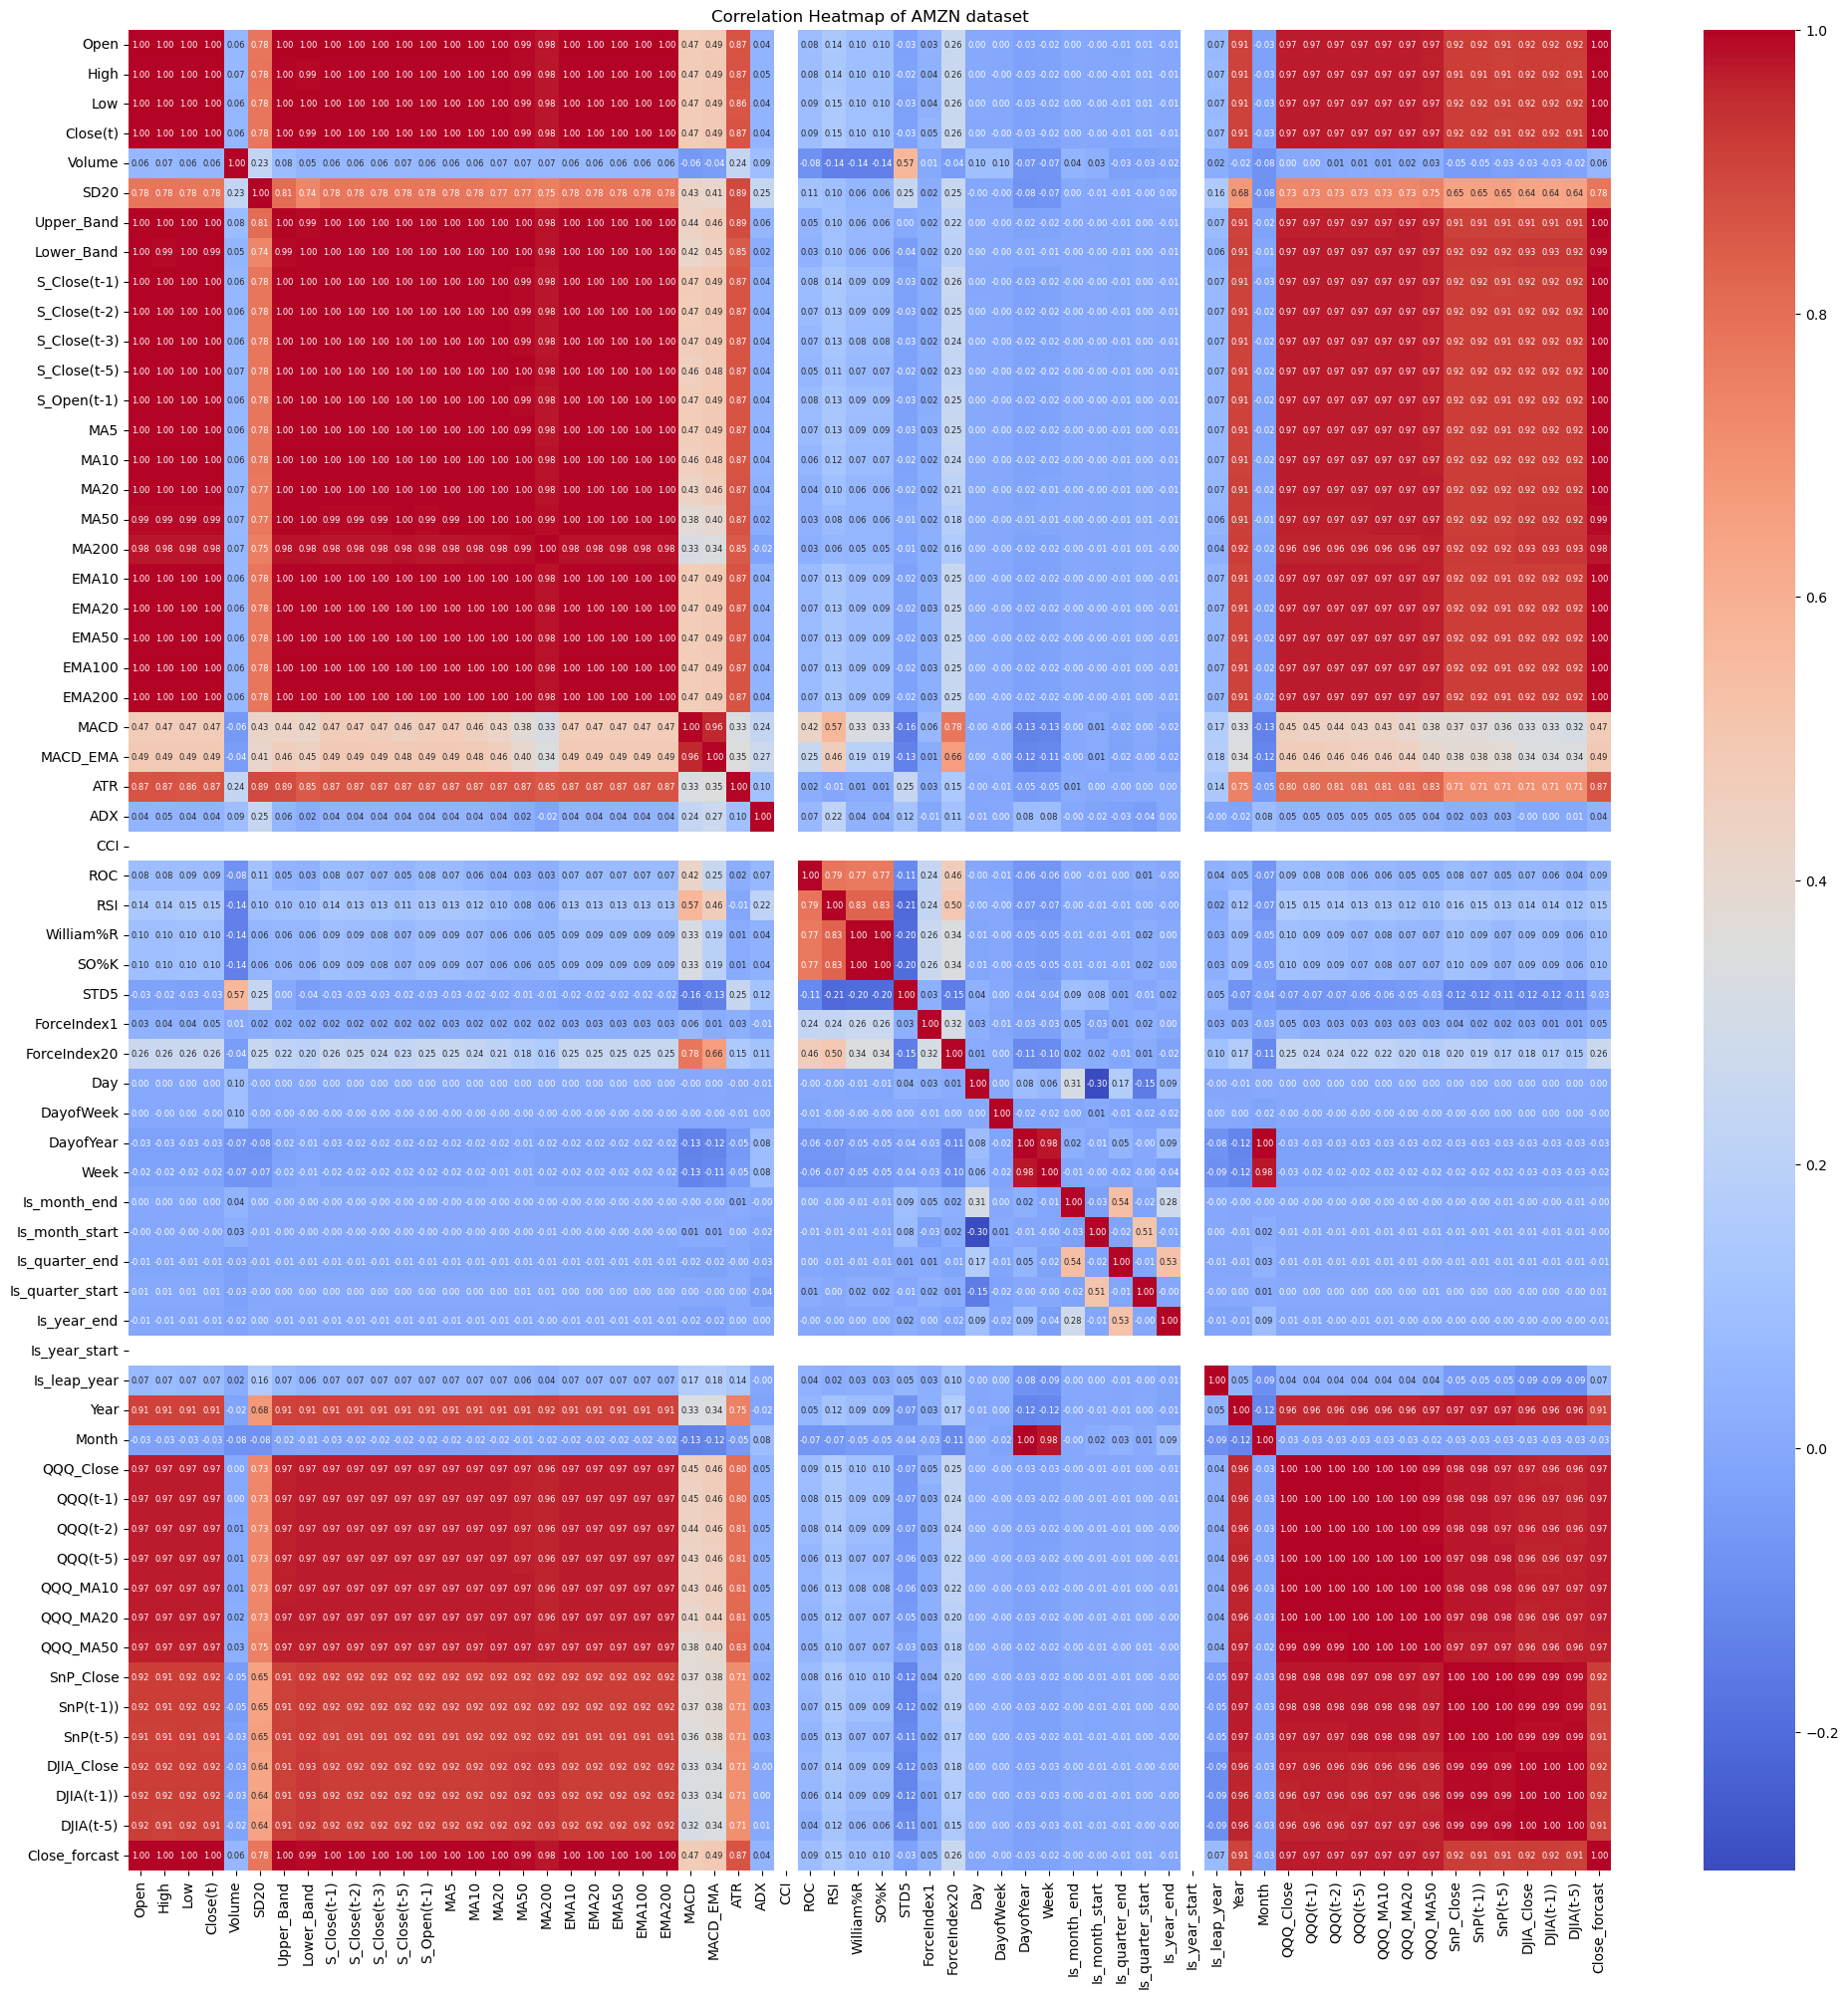

In [ ]:
# Correalation matrix heatmap
correlation_matrix = df_amzn1.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size': 6})
plt.title('Correlation Heatmap of AMZN dataset')
plt.show()

Note: Most of the features have high correlation with the target.

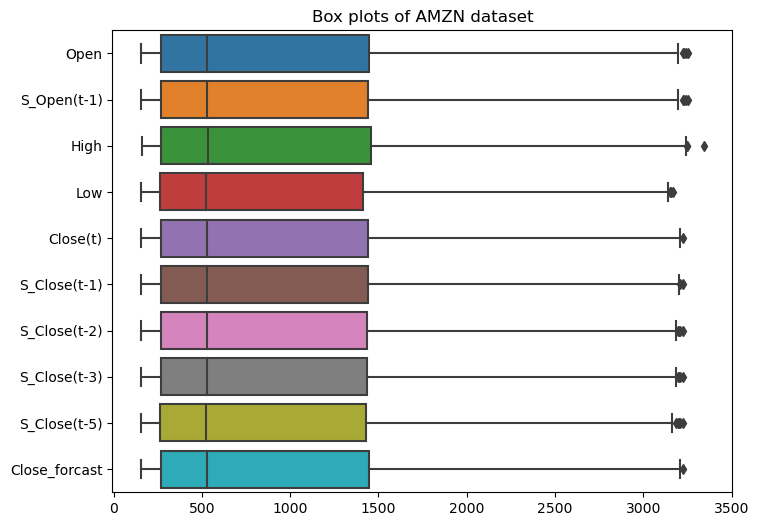

In [ ]:
# Create box plots for selected columns
features = ['Open', 'S_Open(t-1)', 'High', 'Low', 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'Close_forcast']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_amzn1[features], orient='h')
plt.title('Box plots of AMZN dataset')
plt.show()

Note: The data is right skew.

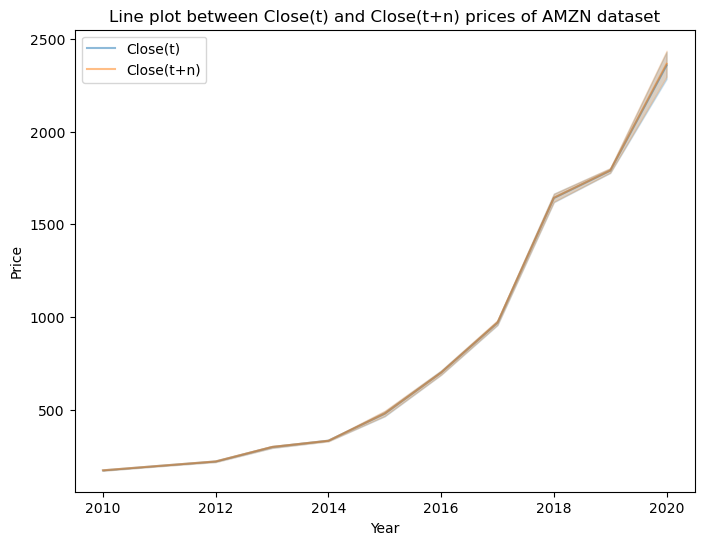

In [ ]:
# Create a line plot between Close(t) and Close(t+n) prices
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_amzn1, x='Year', y='Close(t)', label='Close(t)', alpha=0.5)
sns.lineplot(data=df_amzn1, x='Year', y='Close_forcast', label='Close(t+n)', alpha=0.5)

plt.title('Line plot between Close(t) and Close(t+n) prices of AMZN dataset')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Data Cleaning

In [ ]:
# Identify the missing values
df_amzn1.isna().sum().sum()

0

In [ ]:
# Identify the duplicate rows
df_amzn1.duplicated().sum()

0

Note: No missing values or duplicated data were found

In [ ]:
# Check the datetime columns
df_amzn1[['Date', 'Date_col', 'Day', 'Month', 'Year']].sample(5)

Date    Date_col  Day  Month  Year
1273  06/11/2015  06/11/2015    6     11  2015
1664  30/05/2017  30/05/2017   30      5  2017
32    02/12/2010  02/12/2010    2     12  2010
2435  22/06/2020  22/06/2020   22      6  2020
33    03/12/2010  03/12/2010    3     12  2010

In [ ]:
# Drop date columns
df_amzn1.drop(['Date', 'Date_col'], axis=1, inplace=True)
df_amzn1.shape

(2473, 62)

Note: Date and Date_col were irrelevant to this analysis so, they were dropped.

### Data Splitting

In [ ]:
# Split target and features
X = df_amzn1.drop(['Close_forcast'], axis=1)
y = df_amzn1['Close_forcast']

# Train / Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [ ]:
# Create a dictionary to store the scaling methods
scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize dictionaries to store evaluation results
evaluation_results = {}

# Iterate through each scaling method
for method_name, scaler in scaling_methods.items():
    # Fit and transform the training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    # Calculate the R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation results in a dictionary
    evaluation_results[method_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Print the evaluation results for each scaling method
for method, results in evaluation_results.items():
    print(f'{method} Evaluation Results:')
    print(f'MAE: {results["MAE"]:.6f}')
    print(f'MSE: {results["MSE"]:.6f}')
    print(f'RMSE: {results["RMSE"]:.6f}')
    print(f'R-squared (R2): {results["R2"]:.6f}\n')

StandardScaler Evaluation Results:
MAE: 11.387671
MSE: 394.206518
RMSE: 19.854635
R-squared (R2): 0.999188

MinMaxScaler Evaluation Results:
MAE: 11.387671
MSE: 394.206517
RMSE: 19.854635
R-squared (R2): 0.999188

RobustScaler Evaluation Results:
MAE: 11.387671
MSE: 394.206525
RMSE: 19.854635
R-squared (R2): 0.999188



Note: There is no significant differenece in performance with scalers.

## 1.2 Feature Engineering

### Feature Selection using Correlation Analysis

In [ ]:
# Calculate the correlation coefficients
correlation_matrix = df_amzn1.corr()
correlation_threshold = 0.7  # correlation threshold

# Calculate the absolute correlation coefficients with the target variable
correlation_with_target = abs(correlation_matrix['Close_forcast'])

# Select features with correlation coefficients above the threshold
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index
print("Selected Features with High Correlation to Target:")
print(selected_features)

# Calculate the correlation of the selected features with the target variable
selected_features_correlation = df_amzn1[selected_features].corrwith(df_amzn1['Close_forcast'])
print("\nCorrelation of Selected Features with Target Variable:")
print(selected_features_correlation)

Selected Features with High Correlation to Target:
Index(['Open', 'High', 'Low', 'Close(t)', 'SD20', 'Upper_Band', 'Lower_Band',
       'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)',
       'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'ATR', 'Year', 'QQQ_Close', 'QQQ(t-1)',
       'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close',
       'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)',
       'Close_forcast'],
      dtype='object')

Correlation of Selected Features with Target Variable:
Open             0.999192
High             0.999385
Low              0.999386
Close(t)         0.999520
SD20             0.780474
Upper_Band       0.996531
Lower_Band       0.994614
S_Close(t-1)     0.999111
S_Close(t-2)     0.998677
S_Close(t-3)     0.998278
S_Close(t-5)     0.997420
S_Open(t-1)      0.998786
MA5              0.999052
MA10             0.998375
MA20             0.99714

In [ ]:
# Select high correlated features
df_amzn1_corrSelected = df_amzn1[selected_features]
df_amzn1_corrSelected.shape

(2473, 38)

### Checking performance on Linear Regression with selected features from Correlation Analysis

In [ ]:
# Split the new data
X_corrSelected = df_amzn1_corrSelected.drop(['Close_forcast'], axis=1)
y_corrSelected = df_amzn1_corrSelected['Close_forcast']

# Initialize and apply the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corrSelected)

# Train / Test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_corrSelected, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE): {:.4f}'.format(mae))
print('Mean Squared Error (MSE): {:.4f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse))
print('R-squared (R2): {:.4f}'.format(r2))

Mean Absolute Error (MAE): 11.0902
Mean Squared Error (MSE): 388.4073
Root Mean Squared Error (RMSE): 19.7081
R-squared (R2): 0.9992


### Feature Selection with Lasso Regression

In [ ]:
# Initialize the Lasso model
lasso = Lasso(alpha=1.0) # regularization strength

# Fit the Lasso model
lasso.fit(X, y)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]

# Use selected features for training
X_lassoSelected = X[selected_features]

In [ ]:
# Selected columns
X_lassoSelected.columns

Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'Upper_Band', 'Lower_Band',
       'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)',
       'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'MACD_EMA', 'ADX', 'ROC', 'RSI',
       'William%R', 'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ_MA50',
       'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))',
       'DJIA(t-5)'],
      dtype='object')

In [ ]:
# Number of columns
num_columns = X_lassoSelected.shape[1]
print("Number of columns:", num_columns)

Number of columns: 43


### Checking performance on Linear Regression model with selected features from Lasso Regression

In [ ]:
# Initialize and apply the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lassoSelected)

# Train / Test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE): {:.4f}'.format(mae))
print('Mean Squared Error (MSE): {:.4f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse))
print('R-squared (R2): {:.4f}'.format(r2))

Mean Absolute Error (MAE): 11.2934
Mean Squared Error (MSE): 397.1607
Root Mean Squared Error (RMSE): 19.9289
R-squared (R2): 0.9992


## 1.3 Model Selection

### Hyper-parameter tuning for Lasso Regression

In [ ]:
# Features selected with Correlation Analysis
X1 = df_amzn1_corrSelected.drop(['Close_forcast'], axis=1)
y1 = df_amzn1_corrSelected['Close_forcast']

# Features selected with Lasso Regression
X2 = X_lassoSelected
y2 = df_amzn1['Close_forcast']

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize and fit a StandardScaler to scale the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

lasso_model = Lasso()

# Create a parameter grid to search best regularization strength
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search for the first dataset
lasso_grid1 = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid1.fit(X1_train_scaled, y1_train)
best_alpha1 = lasso_grid1.best_params_['alpha']

# Perform grid search for the second dataset
lasso_grid2 = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid2.fit(X2_train_scaled, y2_train)
best_alpha2 = lasso_grid2.best_params_['alpha']

# Train and evaluate the Lasso Regression model on the first dataset
lasso1 = Lasso(alpha=best_alpha1)
lasso1.fit(X1_train_scaled, y1_train)
y1_pred = lasso1.predict(X1_test_scaled)

mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, y1_pred)

# Train and evaluate the Lasso Regression model on the second dataset
lasso2 = Lasso(alpha=best_alpha2)
lasso2.fit(X2_train_scaled, y2_train)
y2_pred = lasso2.predict(X2_test_scaled)

mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)

# Results
print('Evaluation results of Lasso1')
print('Feature selection method: Correlation Analysis')
print('Best alpha:', best_alpha1)
print('Mean Absolute Error (MAE): {:.4f}'.format(mae1))
print('Mean Squared Error (MSE): {:.4f}'.format(mse1))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse1))
print('R-squared (R2): {:.4f}'.format(r2_1))

print('\nEvaluation results of Lasso2')
print('Feature selection method: Lasso Regression')
print('Best alpha:', best_alpha2)
print('Mean Absolute Error (MAE): {:.4f}'.format(mae2))
print('Mean Squared Error (MSE): {:.4f}'.format(mse2))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse2))
print('R-squared (R2): {:.4f}'.format(r2_2))

Evaluation results of Lasso1
Feature selection method: Correlation Analysis
Best alpha: 1
Mean Absolute Error (MAE): 12.5094
Mean Squared Error (MSE): 523.8985
Root Mean Squared Error (RMSE): 22.8888
R-squared (R2): 0.9989

Evaluation results of Lasso2
Feature selection method: Lasso Regression
Best alpha: 1
Mean Absolute Error (MAE): 12.3841
Mean Squared Error (MSE): 520.2689
Root Mean Squared Error (RMSE): 22.8094
R-squared (R2): 0.9989


### Hyper-parameter tuning for Ridge Regression

In [ ]:
# Features selected with Correlation Analysis
X1 = df_amzn1_corrSelected.drop(['Close_forcast'], axis=1)
y1 = df_amzn1_corrSelected['Close_forcast']

# Features selected with Lasso Regression
X2 = X_lassoSelected
y2 = df_amzn1['Close_forcast']

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize and fit a StandardScaler to scale the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

ridge_model = Ridge()

# Create a parameter grid to search best regularization strength
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search for the first dataset
ridge_grid1 = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_grid1.fit(X1_train_scaled, y1_train)
best_alpha1 = ridge_grid1.best_params_['alpha']

# Perform grid search for the second dataset
ridge_grid2 = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_grid2.fit(X2_train_scaled, y2_train)
best_alpha2 = ridge_grid2.best_params_['alpha']

# Train and evaluate the Lasso Regression model on the first dataset
ridge1 = Ridge(alpha=best_alpha1)
ridge1.fit(X1_train_scaled, y1_train)
y1_pred = ridge1.predict(X1_test_scaled)

mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, y1_pred)

# Train and evaluate the Lasso Regression model on the second dataset
ridge2 = Ridge(alpha=best_alpha2)
ridge2.fit(X2_train_scaled, y2_train)
y2_pred = ridge2.predict(X2_test_scaled)

mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)

# Results
print('Evaluation results of Ridge1')
print('Feature selection method: Correlation Analysis')
print('Best alpha:', best_alpha1)
print('Mean Absolute Error (MAE): {:.4f}'.format(mae1))
print('Mean Squared Error (MSE): {:.4f}'.format(mse1))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse1))
print('R-squared (R2): {:.4f}'.format(r2_1))

print('\nEvaluation results of Ridge2')
print('Feature selection method: Lasso Regression')
print('Best alpha:', best_alpha2)
print('Mean Absolute Error (MAE): {:.4f}'.format(mae2))
print('Mean Squared Error (MSE): {:.4f}'.format(mse2))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse2))
print('R-squared (R2): {:.4f}'.format(r2_2))

Evaluation results of Ridge1
Feature selection method: Correlation Analysis
Best alpha: 0.1
Mean Absolute Error (MAE): 10.9872
Mean Squared Error (MSE): 382.9628
Root Mean Squared Error (RMSE): 19.5694
R-squared (R2): 0.9992

Evaluation results of Ridge2
Feature selection method: Lasso Regression
Best alpha: 0.1
Mean Absolute Error (MAE): 11.1020
Mean Squared Error (MSE): 393.8915
Root Mean Squared Error (RMSE): 19.8467
R-squared (R2): 0.9992


## 1.4 Evaluation

### K-Fold Cross Validation

In [ ]:
# Load dataset and prepare X and y
X = df_amzn1_corrSelected.drop(['Close_forcast'], axis=1)
y = df_amzn1_corrSelected['Close_forcast']

# Define model
model = Ridge(alpha=0.1)

# Create a K-Fold Cross-Validation (K=10) object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store the predictions and true labels
predictions = []
true_labels = []

# Initialize the StandardScaler
scaler = StandardScaler()

# Initialize variables to store regression metrics for each fold
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

# Initialize variables to store metrics for both train and test sets
mae_train_values = []
mse_train_values = []
rmse_train_values = []
r2_train_values = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)

    # Predictions on the test set
    y_pred_test = model.predict(X_test_scaled)

    # Predictions on the training set
    y_pred_train = model.predict(X_train_scaled)

    # Extend the lists for true labels and predictions
    predictions.extend(y_pred_test)
    true_labels.extend(y_test)

    # Calculate and store regression metrics for the test set
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)

    # Calculate and store regression metrics for the training set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_train_values.append(mae_train)
    mse_train_values.append(mse_train)
    rmse_train_values.append(rmse_train)
    r2_train_values.append(r2_train)

# Calculate the mean of each metric across all folds for test set
mean_mae = np.mean(mae_values)
mean_mse = np.mean(mse_values)
mean_rmse = np.mean(rmse_values)
mean_r2 = np.mean(r2_values)

# Calculate the mean of each metric across all folds for training set
mean_mae_train = np.mean(mae_train_values)
mean_mse_train = np.mean(mse_train_values)
mean_rmse_train = np.mean(rmse_train_values)
mean_r2_train = np.mean(r2_train_values)

# Print the mean values of MAE, MSE, RMSE, and R2 for the test set
print("Test Set Metrics:")
print("Mean MAE:", format(mean_mae, ".4f"))
print("Mean MSE:", format(mean_mse, ".4f"))
print("Mean RMSE:", format(mean_rmse, ".4f"))
print("Mean R2:", format(mean_r2, ".4f"))

# Print the mean values of MAE, MSE, RMSE, and R2 for the training set
print("\nTraining Set Metrics:")
print("Mean MAE (Training):", format(mean_mae_train, ".4f"))
print("Mean MSE (Training):", format(mean_mse_train, ".4f"))
print("Mean RMSE (Training):", format(mean_rmse_train, ".4f"))
print("Mean R2 (Training):", format(mean_r2_train, ".4f"))

Test Set Metrics:
Mean MAE: 11.5814
Mean MSE: 484.3347
Mean RMSE: 21.7648
Mean R2: 0.9990

Training Set Metrics:
Mean MAE (Training): 11.2646
Mean MSE (Training): 443.0069
Mean RMSE (Training): 21.0443
Mean R2 (Training): 0.9991


### Learning Curves

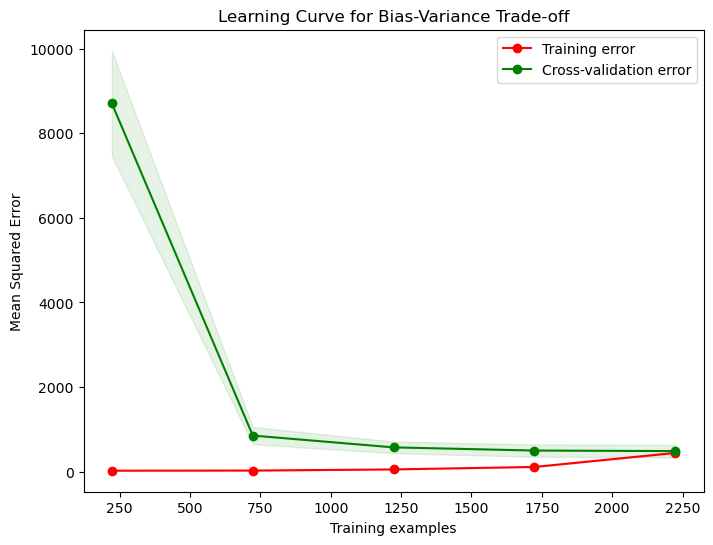

In [ ]:
# Load dataset and prepare X and y
X = df_amzn1_corrSelected.drop(['Close_forcast'], axis=1)
y = df_amzn1_corrSelected['Close_forcast']

# Initialize and apply the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define model
model = Ridge(alpha=0.1)

# Set up K Fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an array of training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive values
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a plot
plt.figure(figsize=(8, 6))
plt.title("Learning Curve for Bias-Variance Trade-off")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
#plt.grid()

# Plot the mean training and test scores with a fill between them
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")

plt.legend(loc="best")
plt.show()

# 2 Classification Approach
Goal: to predict whether the stock price will 'go up, go down, or remain relatively stable' on the next nth-day.

'FB.csv' was used here for the classification approach.

## 2.1 Data Preprocessing

### Data Inspection & EDA

In [ ]:
# Create a copy dataset to preserve the original dataset
df_fb1 = df_fb.copy(deep=True)

In [ ]:
# Preview the df
df_fb1.head()

Date   Open   High    Low  Close(t)    Volume      SD20  Upper_Band  \
0  2015-10-16  96.18  97.59  95.35     97.54  25412900  2.446186   97.858871   
1  2015-10-19  97.18  98.57  96.92     98.47  23729900  2.684070   98.480639   
2  2015-10-20  98.73  99.59  96.56     97.00  30881800  2.820542   98.955584   
3  2015-10-21  97.37  98.18  96.47     97.11  21917800  2.943654   99.358808   
4  2015-10-22  97.79  99.73  97.55     99.67  26392100  3.250863  100.236226   

   Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  S_Close(t-5)  \
0   88.074129         95.96         94.07         94.12         93.24   
1   87.744361         97.54         95.96         94.07         94.26   
2   87.673416         98.47         97.54         95.96         94.12   
3   87.584192         97.00         98.47         97.54         94.07   
4   87.232774         97.11         97.00         98.47         95.96   

   S_Open(t-1)     MA5    MA10     MA20     MA50     MA200      EMA10  \
0        94.99  95.190  94.087  92.9665  91.8370  84.60085  95.477668   
1        96.18  96.032  94.533  93.1125  91.9204  84.70095  96.475112   
2        97.18  96.608  94.953  93.3145  91.9774  84.80000  96.650074   
3        98.73  97.216  95.424  93.4715  92.0472  84.90480  96.803383   
4        97.37  97.958  96.144  93.7345  92.1568  85.02240  97.758922   

       EMA20      EMA50     EMA100     EMA200      MACD  MACD_EMA       ATR  \
0  95.477668  95.477668  95.477668  95.477668  1.062872  0.584317  2.442920   
1  96.475112  96.475112  96.475112  96.475112  1.333844  0.734222  2.386283   
2  96.650074  96.650074  96.650074  96.650074  1.413678  0.870113  2.432263   
3  96.803383  96.803383  96.803383  96.803383  1.468892  0.989869  2.380673   
4  97.758922  97.758922  97.758922  97.758922  1.699627  1.131821  2.397768   

         ADX          CCI       ROC        RSI  William%R       SO%K  \
0  11.336243  1333.333333  5.941132  64.432385  -0.421230  99.578770   
1  12.008037  1333.333333  4.744176  66.408051  -0.946970  99.053030   
2  13.010564  1333.333333  4.525862  60.671359 -23.063224  76.936776   
3  13.884615  1333.333333  5.097403  60.943252 -22.103387  77.896613   
4  15.256165  1333.333333  7.786309  66.711162  -0.647948  99.352052   

       STD5  ForceIndex1  ForceIndex20    Date_col  Day  DayofWeek  DayofYear  \
0  0.009788   40152382.0    79796506.0  2015-10-16   16          4        289   
1  0.009742   22068807.0    69291308.0  2015-10-19   19          0        292   
2  0.014152  -45396246.0   124762472.0  2015-10-20   20          1        293   
3  0.013975    2410958.0    68821892.0  2015-10-21   21          2        294   
4  0.015681   67563776.0   138822446.0  2015-10-22   22          3        295   

   Week  Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
0    42             0               0               0                 0   
1    43             0               0               0                 0   
2    43             0               0               0                 0   
3    43             0               0               0                 0   
4    43             0               0               0                 0   

   Is_year_end  Is_year_start  Is_leap_year  Year  Month  QQQ_Close  QQQ(t-1)  \
0            0              0             0  2015     10     103.50    103.07   
1            0              0             0  2015     10     104.09    103.50   
2            0              0             0  2015     10     103.56    104.09   
3            0              0             0  2015     10     102.92    103.56   
4            0              0             0  2015     10     105.02    102.92   

   QQQ(t-2)  QQQ(t-5)  QQQ_MA10  QQQ_MA20  QQQ_MA50  SnP_Close  SnP(t-1))  \
0    101.40    101.98   101.787  100.1025  100.8126    2033.11    2023.86   
1    103.07    102.23   102.097  100.2490  100.7876    2033.66    2033.11   
2    103.50    101.56   102.402  100.4445  100.7280    2030.77    2033.66   
3    104.

In [ ]:
# Shape of the df
df_fb1.shape

(1215, 64)

In [ ]:
# Column Names
df_fb1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [ ]:
# Summary info
df_fb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1215 non-null   object 
 1   Open              1215 non-null   float64
 2   High              1215 non-null   float64
 3   Low               1215 non-null   float64
 4   Close(t)          1215 non-null   float64
 5   Volume            1215 non-null   int64  
 6   SD20              1215 non-null   float64
 7   Upper_Band        1215 non-null   float64
 8   Lower_Band        1215 non-null   float64
 9   S_Close(t-1)      1215 non-null   float64
 10  S_Close(t-2)      1215 non-null   float64
 11  S_Close(t-3)      1215 non-null   float64
 12  S_Close(t-5)      1215 non-null   float64
 13  S_Open(t-1)       1215 non-null   float64
 14  MA5               1215 non-null   float64
 15  MA10              1215 non-null   float64
 16  MA20              1215 non-null   float64


In [ ]:
# Check the closing price columns
df_fb1[[ 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)']].head(5)

Close(t)  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  S_Close(t-5)
0     97.54         95.96         94.07         94.12         93.24
1     98.47         97.54         95.96         94.07         94.26
2     97.00         98.47         97.54         95.96         94.12
3     97.11         97.00         98.47         97.54         94.07
4     99.67         97.11         97.00         98.47         95.96

In [ ]:
# Check the closing price columns
df_fb1[['Close(t)', 'Close_forcast']].tail(5)

Close(t)  Close_forcast
1210    268.44         263.00
1211    263.00         256.13
1212    256.13         259.89
1213    259.89         261.30
1214    261.30         261.24

In [ ]:
# Summary statistics
df_fb1.describe()

Open         High          Low     Close(t)        Volume  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1.215000e+03   
mean    161.260872   163.025062   159.464782   161.352206  2.193150e+07   
std      35.907687    36.455796    35.470869    36.002395  1.378257e+07   
min      92.830000    95.000000    89.370000    94.160000  5.913100e+06   
25%     129.175000   129.980000   128.245000   129.150000  1.367310e+07   
50%     166.010000   168.340000   164.200000   166.290000  1.842240e+07   
75%     184.915000   186.830000   183.420000   185.345000  2.475265e+07   
max     268.040000   278.890000   263.430000   268.440000  1.698037e+08   

              SD20   Upper_Band   Lower_Band  S_Close(t-1)  S_Close(t-2)  \
count  1215.000000  1215.000000  1215.000000   1215.000000   1215.000000   
mean      4.775727   169.655129   150.552220    161.216123    161.079646   
std       3.256429    38.469932    32.725619     35.936717     35.876491   
min       0.719126    97.858871    85.940276     94.160000     94.070000   
25%       2.424704   133.066481   123.944955    129.060000    129.020000   
50%       4.124414   175.253308   154.833256    166.280000    166.080000   
75%       6.059513   195.254473   173.346231    185.315000    185.305000   
max      20.436283   272.146187   229.090179    268.440000    268.440000   

       S_Close(t-3)  S_Close(t-5)  S_Open(t-1)          MA5         MA10  \
count   1215.000000   1215.000000  1215.000000  1215.000000  1215.000000   
mean     160.946305    160.663226   161.123786   161.080341   160.737347   
std       35.823960     35.673772    35.842375    35.757063    35.485080   
min       94.070000     93.240000    92.830000    95.190000    94.087000   
25%      128.960000    128.825000   129.150000   128.928000   128.767000   
50%      166.020000    165.980000   165.900000   166.114000   166.336000   
75%      185.265000    185.175000   184.890000   185.108000   184.619000   
max      268.440000    265.280000   268.040000   262.548000   257.862000   

              MA20         MA50        MA200        EMA10        EMA20  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean    160.103674   158.280228   150.862388   161.080039   161.080039   
std      35.114579    34.076805    33.559369    35.705342    35.705342   
min      92.966500    91.837000    84.600850    95.233576    95.233576   
25%     128.593000   126.337900   120.372725   128.954709   128.954709   
50%     166.397500   168.144200   162.661100   166.243386   166.243386   
75%     184.265000   184.012500   177.305025   184.922607   184.922607   
max     247.120500   239.956800   208.019050   259.839849   259.839849   

             EMA50       EMA100       EMA200         MACD     MACD_EMA  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean    161.080039   161.080039   161.080039     0.865968     0.849209   
std      35.705342    35.705342    35.705342     3.421720     3.211611   
min      95.233576    95.233576    95.233576   -15.012205   -13.226131   
25%     128.954709   128.954709   128.954709    -0.623268    -0.645794   
50%     166.243386   166.243386   166.243386     1.202555     1.234199   
75%     184.922607   184.922607   184.922607     2.609396     2.503120   
max     259.839849   259.839849   259.839849    12.152690    10.901398   

               ATR          ADX           CCI          ROC          RSI  \
count  1215.000000  1215.000000  1.215000e+03  1215.000000  1215.000000   
mean      3.879751    24.378116  1.333333e+03     1.001862    54.833036   
std       1.890964     9.075277  1.753985e-11     5.700901    11.561069   
min       1.372680     9.794447  1.333333e+03   -25.671961    25.287073   
25%       2.457004    17.415307  1.333333e+03    -1.978907    46.632989   
50%       3.583488    23.037641  1.333333e+03     1.259024    55.905110   
75%       4.755229    29.387606  1.333333e+03     4.202147    63.909921   
max      11.028703    58.323776  1

C:\Users\KaungHtetHein\AppData\Local\Temp\ipykernel_12100\2957863576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_fb1.corr()


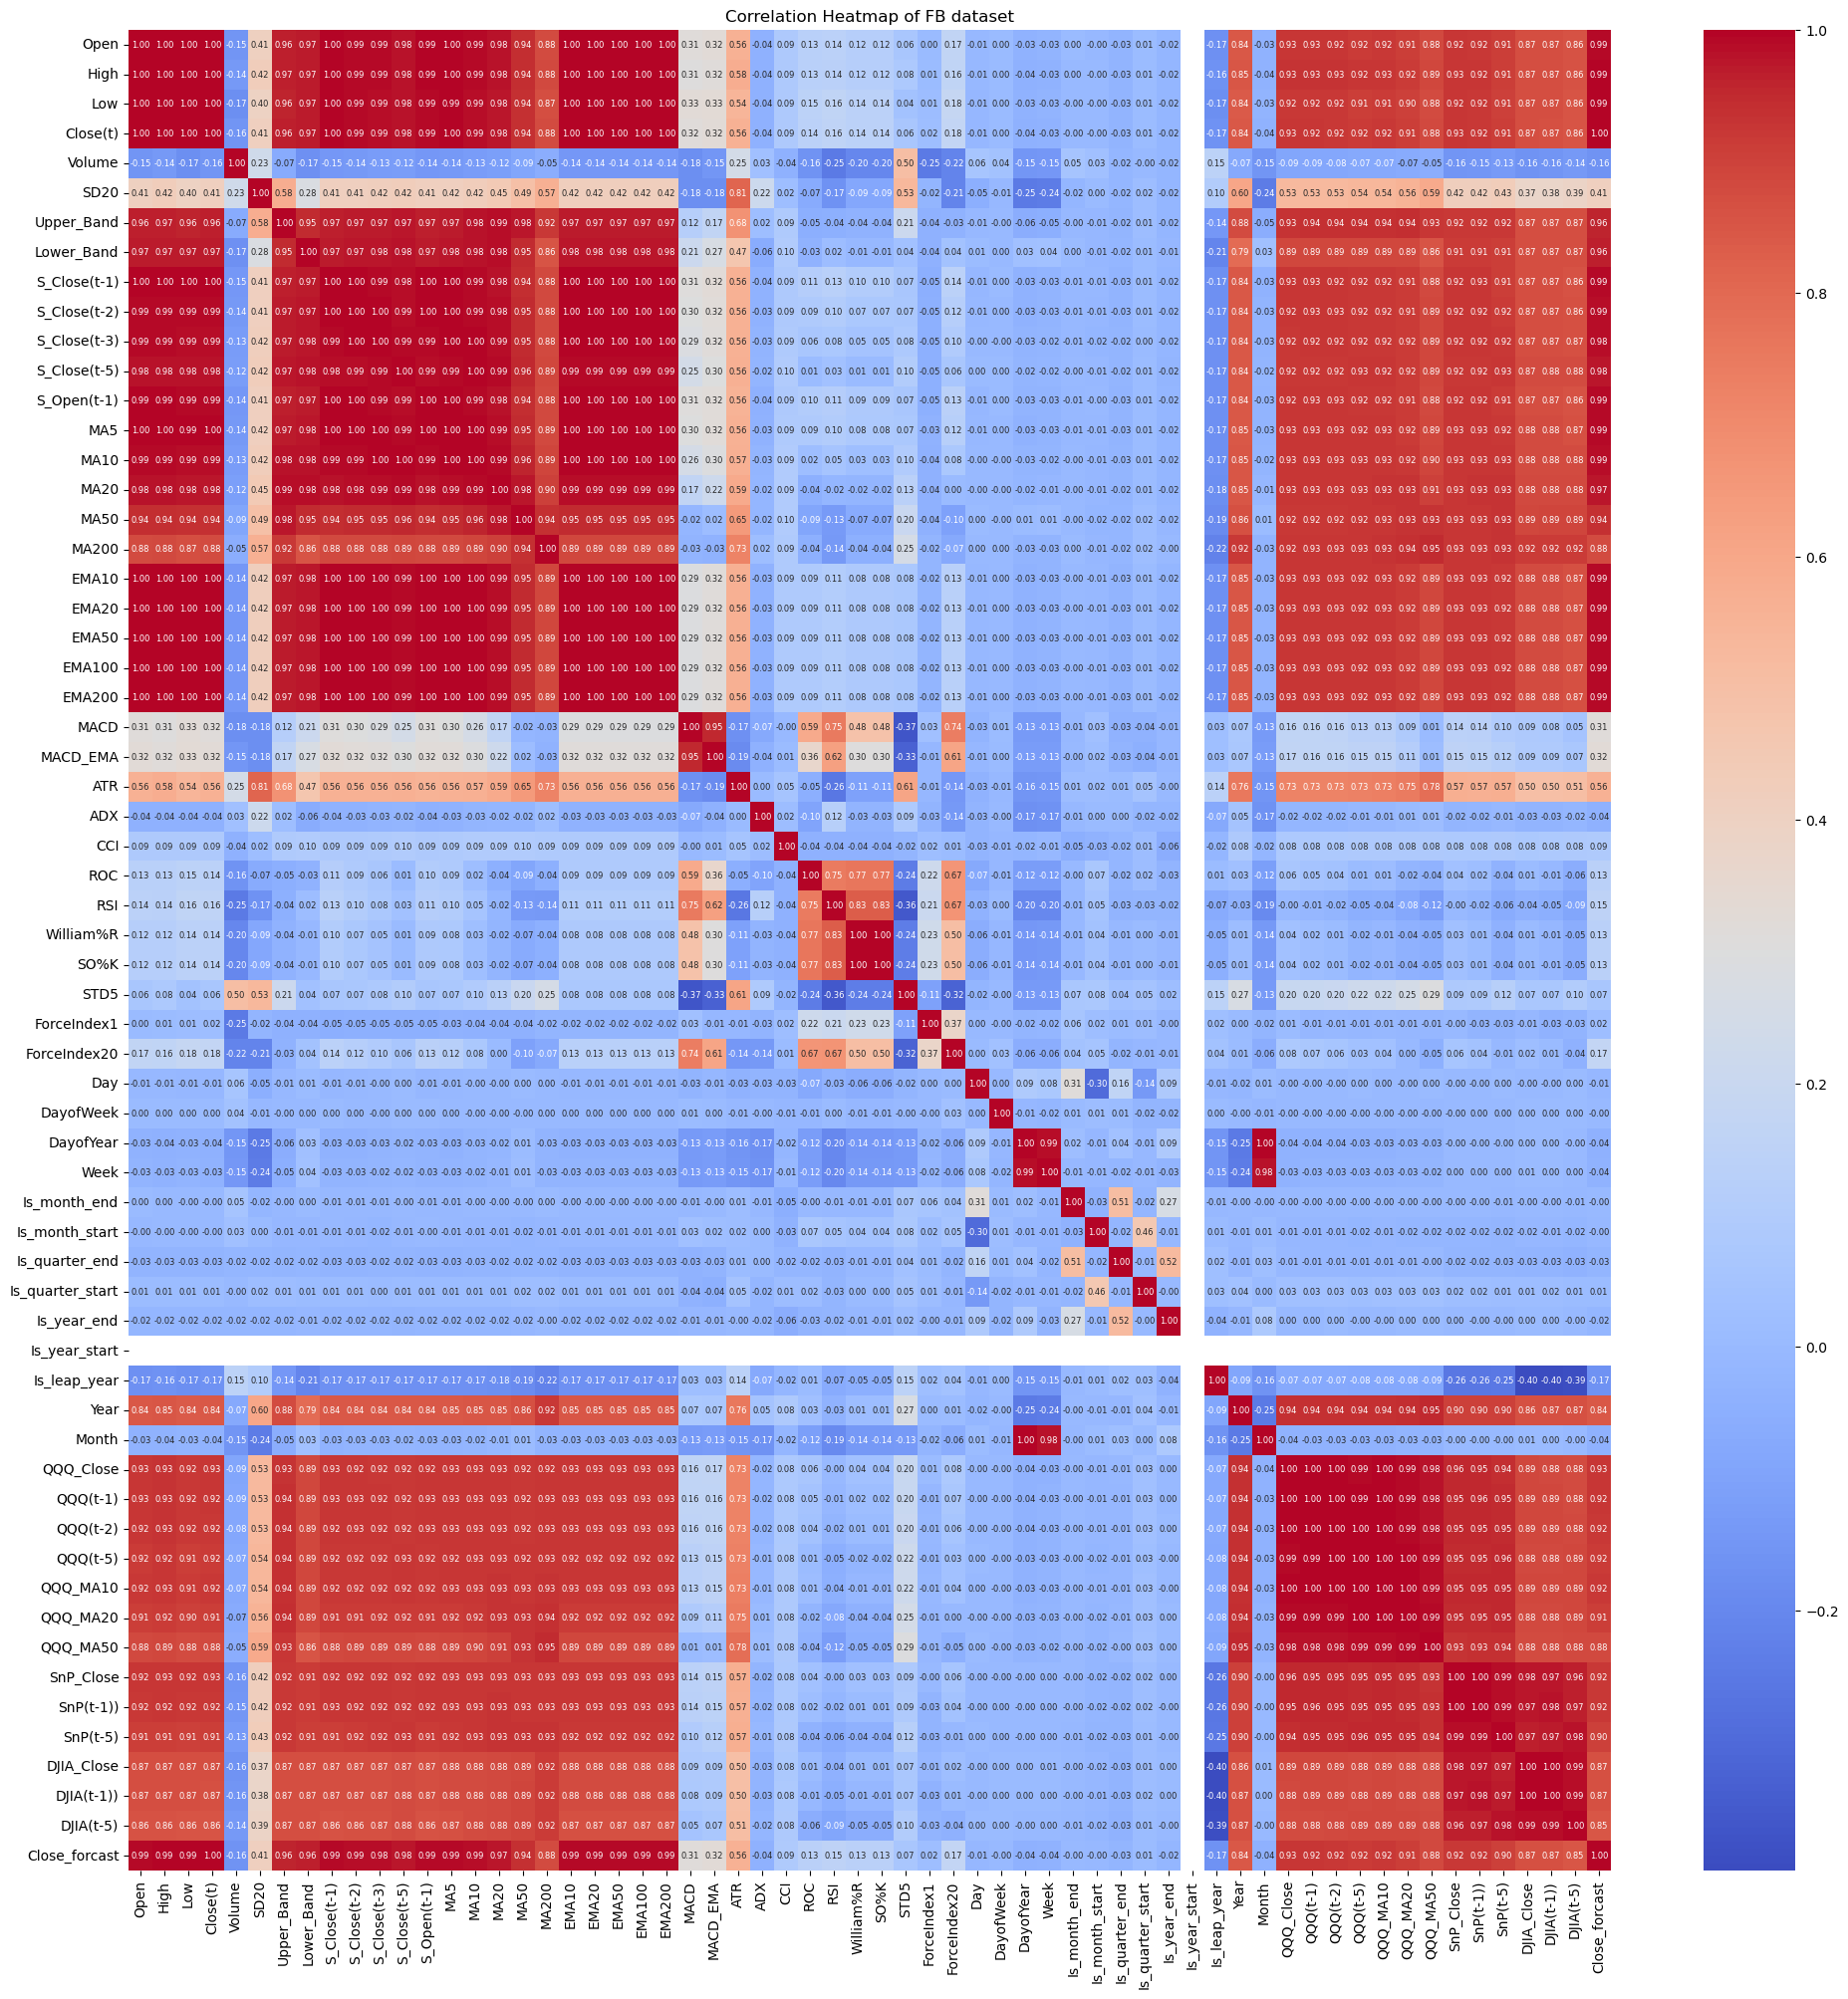

In [ ]:
# Correalation matrix heatmap
correlation_matrix = df_fb1.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size': 6})
plt.title('Correlation Heatmap of FB dataset')
plt.show()

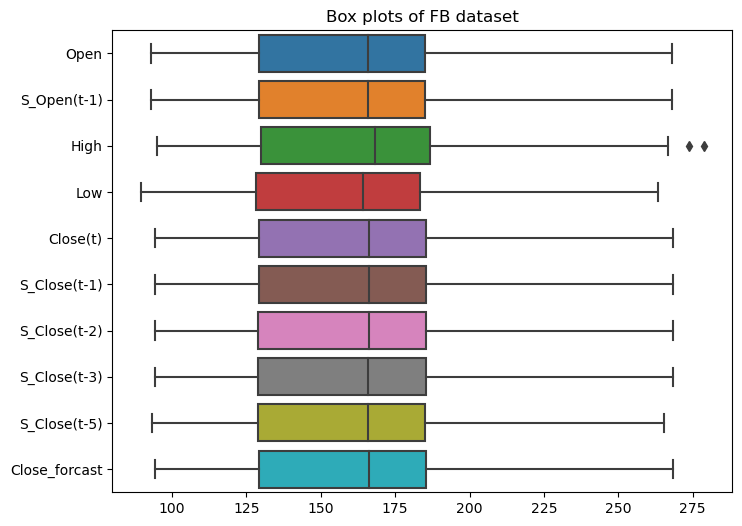

In [ ]:
# Create a box plot for the selected columns
features = ['Open', 'S_Open(t-1)', 'High', 'Low', 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'Close_forcast']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_fb1[features], orient='h')
plt.title('Box plots of FB dataset')
plt.show()

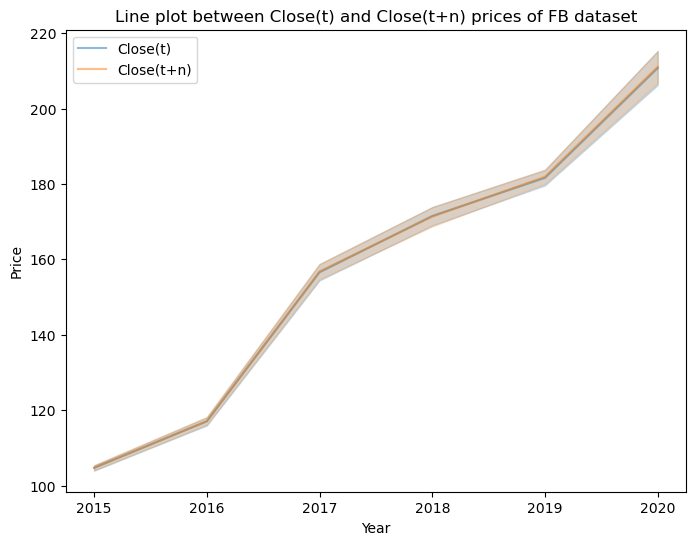

In [ ]:
# Create a line plot between Close(t) and Close(t+n) prices
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_fb1, x='Year', y='Close(t)', label='Close(t)', alpha=0.5)
sns.lineplot(data=df_fb1, x='Year', y='Close_forcast', label='Close(t+n)', alpha=0.5)

plt.title('Line plot between Close(t) and Close(t+n) prices of FB dataset')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Data Cleaning

In [ ]:
# Identify the missing values
df_fb1.isna().sum().sum()

0

In [ ]:
# Identify the duplicate rows
df_fb1.duplicated().sum()

0

Note: No missing values or duplicated data were found

In [ ]:
# Check the datetime columns
df_fb1[['Date', 'Date_col', 'Day', 'Month', 'Year']].sample(5)

Date    Date_col  Day  Month  Year
50    2015-12-29  2015-12-29   29     12  2015
1004  2019-10-14  2019-10-14   14     10  2019
169   2016-06-20  2016-06-20   20      6  2016
382   2017-04-25  2017-04-25   25      4  2017
616   2018-03-29  2018-03-29   29      3  2018

In [ ]:
# Drop date columns
df_fb1.drop(['Date', 'Date_col'], axis=1, inplace=True)
df_fb1.shape

(1215, 62)

Note: Date and Date_col were irrelevant to this analysis so, they were dropped.

## 2.2 Feature Engineering

In this step, a new target feature will be created. A categorical column with 3 stock price movements (up, down, stable) of nth day forward (n = 1).

### Creating new target feature 'Forecast_Status'

In [ ]:
# Define the threshold values for 'Up' and 'Down' movements
up_threshold = 0.01  # 1% or more price increase
down_threshold = -0.01  # 1% or more price decrease

# Create a new column 'Forecast_Status' with default value 'Stable'
df_fb1['Forecast_Status'] = 'Stable'

# Calculate the price change between 'Close(t+n)' and 'Close(t)' and normalizing it by 'Close(t)'
price_change = (df_fb1['Close_forcast'] - df_fb1['Close(t)']) / df_fb1['Close(t)']

# Set 'Up' for price changes exceeding the up_threshold
df_fb1.loc[price_change > up_threshold, 'Forecast_Status'] = 'Up'

# Set 'Down' for price changes exceeding the down_threshold
df_fb1.loc[price_change < down_threshold, 'Forecast_Status'] = 'Down'

In [ ]:
# Check sample data to see if it works
df_fb1['Forecast_Status'].sample(5)

17         Up
695        Up
945    Stable
796      Down
455    Stable
Name: Forecast_Status, dtype: object

In [ ]:
# Shape of the df
df_fb1.shape

(1215, 63)

In [ ]:
# Check sample data to see if the labling was correct
df_fb1[['Close(t)', 'Close_forcast', 'Forecast_Status']]

Close(t)  Close_forcast Forecast_Status
0        97.54          98.47          Stable
1        98.47          97.00            Down
2        97.00          97.11          Stable
3        97.11          99.67              Up
4        99.67         102.19              Up
...        ...            ...             ...
1210    268.44         263.00            Down
1211    263.00         256.13            Down
1212    256.13         259.89              Up
1213    259.89         261.30          Stable
1214    261.30         261.24          Stable

[1215 rows x 3 columns]

In [ ]:
# Check missing values
df_fb1['Forecast_Status'].isnull().sum()

0

In [ ]:
# Calculate value counts
value_counts = df_fb1['Forecast_Status'].value_counts()
# Calculate percentage
percentages = (value_counts / len(df_fb1['Forecast_Status'])) * 100
result = pd.DataFrame({'Count': round(value_counts, 2), 'Percentage': round(percentages, 2)})
print(result.T)

            Stable      Up    Down
Count       649.00  329.00  237.00
Percentage   53.42   27.08   19.51


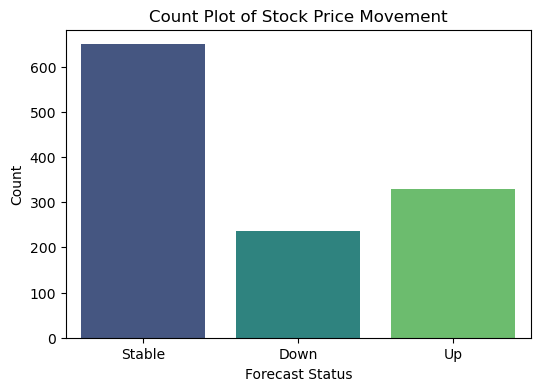

In [ ]:
# Create count plot to visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_fb1, x='Forecast_Status', palette='viridis')
plt.xlabel('Forecast Status')
plt.ylabel('Count')
plt.title('Count Plot of Stock Price Movement')
plt.show()

Note: Imbalanced classes.

### Label Encoding

In [ ]:
# Initialize a label encoder
label_encoder = LabelEncoder()
# Encode the target variable
df_fb1['Forecast_Status_encoded'] = label_encoder.fit_transform(df_fb1['Forecast_Status'])

In [ ]:
# Shape of the df
df_fb1.shape

(1215, 64)

In [ ]:
# Check sample data to see if the encoding works
df_fb1[['Forecast_Status', 'Forecast_Status_encoded']].sample(5)

Forecast_Status  Forecast_Status_encoded
310              Up                        2
63           Stable                        1
948          Stable                        1
670              Up                        2
957              Up                        2

In [ ]:
# Drop the categorical column after encoding
df_fb1.drop(['Forecast_Status'], axis=1, inplace=True)
df_fb1.shape

(1215, 63)

In [ ]:
# Column names
df_fb1.columns

Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
       'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close',
       'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast', 'Forecast_Status_encoded'],
      dtype='object')

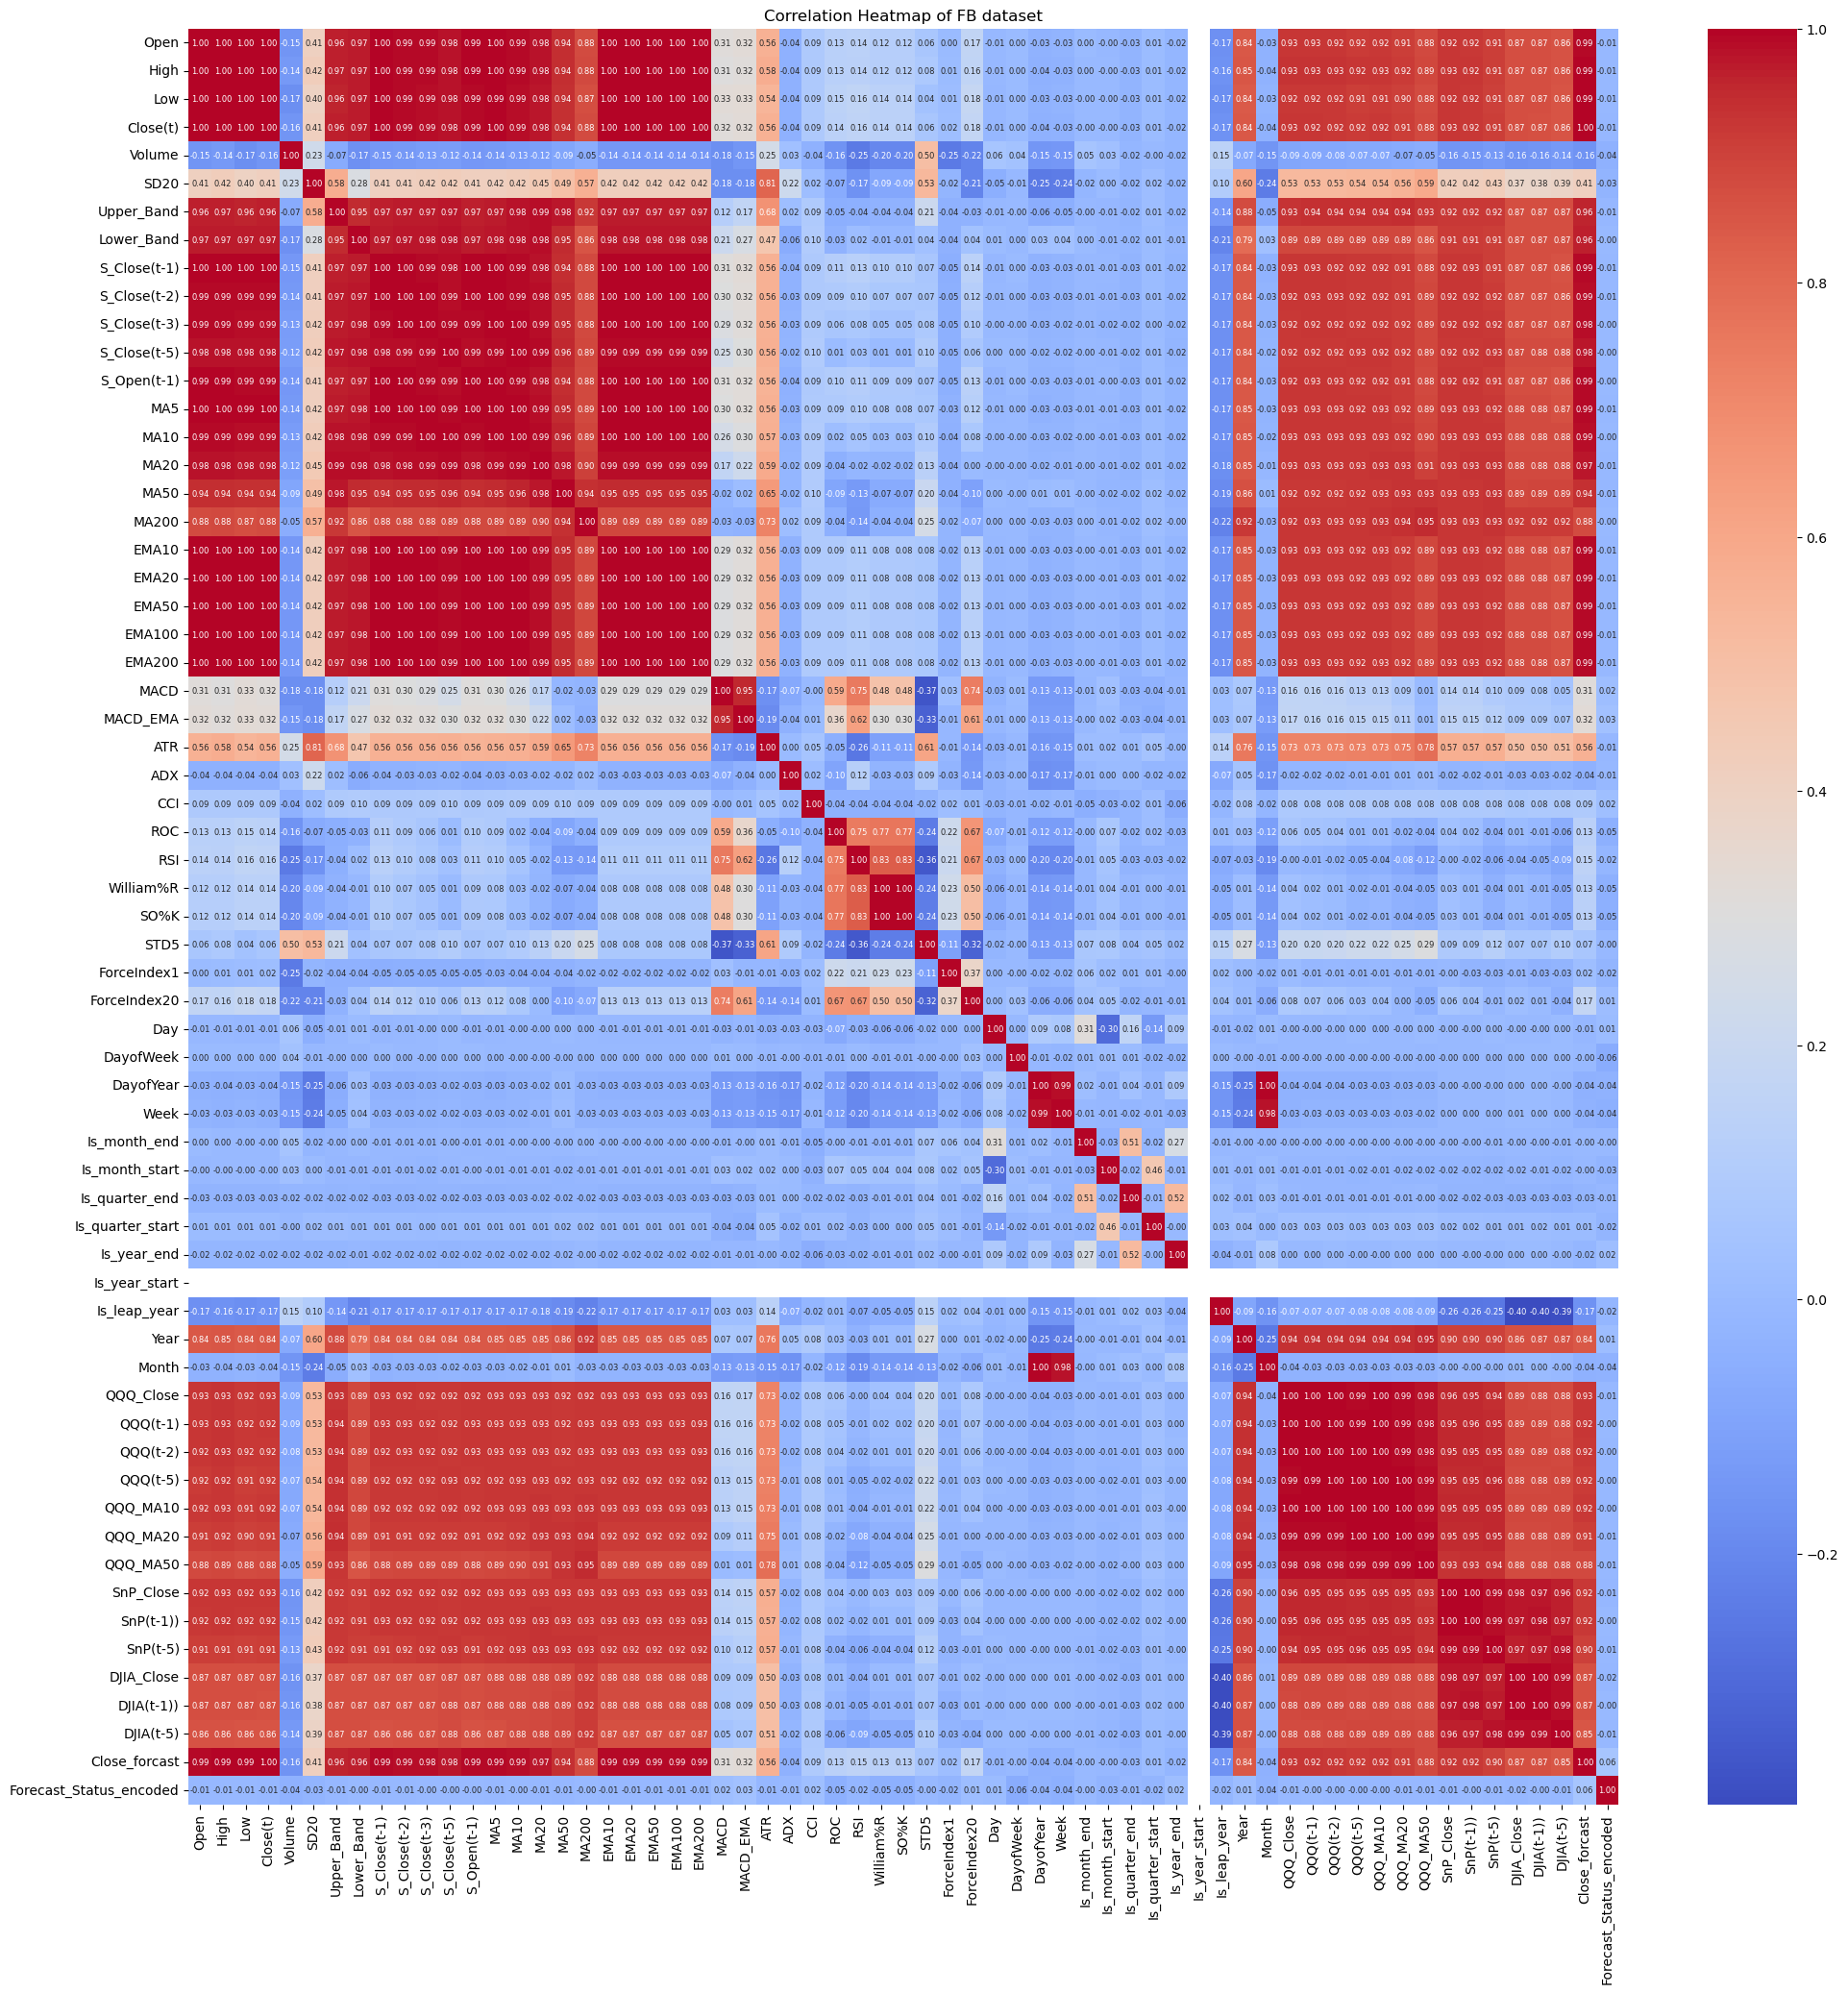

In [ ]:
# Correalation matrix heatmap
correlation_matrix = df_fb1.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size': 6})
plt.title('Correlation Heatmap of FB dataset')
plt.show()

Note: The correlation drops significantly after the creation of new target feature.

### Data Splitting

In [ ]:
# Split target and features
X = df_fb1.drop(['Forecast_Status_encoded'], axis=1)
y = df_fb1['Forecast_Status_encoded']

# Train / Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(1215, 62)
(1215,)


### Feature Scaling

In [ ]:
# Initialize the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_test_scaled)

    # Calculate and store the classification report and accuracy score
    classification_rep = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])
    accuracy = accuracy_score(y_test, y_pred)

    results[scaler_name] = {
        "classification_report": classification_rep,
        "accuracy_score": accuracy
    }

# Print results
for scaler_name, metrics in results.items():
    print(f"Scaler: {scaler_name}")
    print(f"Accuracy Score: {metrics['accuracy_score']:.6f}")
    print("Classification Report:")
    print(metrics["classification_report"])
    print('\n')

Scaler: StandardScaler
Accuracy Score: 0.473973
Classification Report:
              precision    recall  f1-score   support

        Down       0.26      0.25      0.25        64
      Stable       0.59      0.62      0.61       200
          Up       0.35      0.33      0.34       101

    accuracy                           0.47       365
   macro avg       0.40      0.40      0.40       365
weighted avg       0.47      0.47      0.47       365



Scaler: MinMaxScaler
Accuracy Score: 0.473973
Classification Report:
              precision    recall  f1-score   support

        Down       0.23      0.25      0.24        64
      Stable       0.60      0.62      0.61       200
          Up       0.37      0.33      0.35       101

    accuracy                           0.47       365
   macro avg       0.40      0.40      0.40       365
weighted avg       0.47      0.47      0.47       365



Scaler: RobustScaler
Accuracy Score: 0.473973
Classification Report:
              precision  

### Feature Selection using SelectPercentile

In [ ]:
# Split target and features
X = df_fb1.drop(['Forecast_Status_encoded'], axis=1)
y = df_fb1['Forecast_Status_encoded']

# Create an instance of SelectPercentile with the desired percentile and f_classif scoring
percentile = 50
selector = SelectPercentile(score_func=f_classif, percentile=percentile)

# Fit the selector to the data (X and y)
X_percentileSelected = selector.fit_transform(X, y)

# Get the selected features and their scores
selected_features = selector.get_support()
feature_scores = selector.scores_

# Print the indices of selected features
selected_indices = [i for i, selected in enumerate(selected_features) if selected]
print("Indices of selected features:", selected_indices)

# Create a list of selected feature names
selected_feature_names = [X.columns[i] for i in selected_indices]

# Get the count of selected features
selected_features_count = len(selected_feature_names)

# Print the names of selected features and the count
print("Selected feature names:", selected_feature_names)
print("Number of selected features:", selected_features_count)

Indices of selected features: [4, 5, 6, 14, 15, 16, 17, 23, 24, 25, 27, 28, 29, 30, 31, 32, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
Selected feature names: ['Volume', 'SD20', 'Upper_Band', 'MA10', 'MA20', 'MA50', 'MA200', 'MACD', 'MACD_EMA', 'ATR', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5', 'Year', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast']
Number of selected features: 31


C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Checking performance on Decision Tree Classifier with selected features from SelectPercentile

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_percentileSelected, y, test_size=0.3, random_state=42)

# Initialize and fit a StandardScaler to scale the features on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])

print(f"Accuracy of Decision Tree Classifier: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of Decision Tree Classifier: 0.4904
Classification Report:
              precision    recall  f1-score   support

        Down       0.26      0.19      0.22        64
      Stable       0.60      0.64      0.62       200
          Up       0.37      0.39      0.38       101

    accuracy                           0.49       365
   macro avg       0.41      0.40      0.41       365
weighted avg       0.48      0.49      0.48       365



### Feature Selection using Feature Importance

In [ ]:
# Create and fit a Decision Tree classifier to get feature importances
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Sort the feature indices by importance in descending order
sorted_feature_indices = feature_importances.argsort()[::-1]

# Set a threshold for feature importance
threshold = 0.02

# Select features with importance greater than the threshold
selected_indices = [index for index in sorted_feature_indices if feature_importances[index] > threshold]
selected_features = X.columns[selected_indices]

# Get the count of selected features
selected_features_count = len(selected_features)

# Print the indices of selected features
print("Indices of selected features based on feature importance:", selected_indices)

# Print the names of selected features
print("Selected feature names based on feature importance:", selected_features)

# Print the count of selected features
print("Number of selected features:", selected_features_count)

Indices of selected features based on feature importance: [25, 28, 61, 33, 30, 35, 4, 26, 34, 24, 5, 32, 51, 13, 55, 29, 2]
Selected feature names based on feature importance: Index(['ATR', 'ROC', 'Close_forcast', 'ForceIndex1', 'William%R', 'Day',
       'Volume', 'ADX', 'ForceIndex20', 'MACD_EMA', 'SD20', 'STD5', 'QQQ(t-5)',
       'MA5', 'SnP_Close', 'RSI', 'Low'],
      dtype='object')
Number of selected features: 17


In [ ]:
X_fImportantSelected = df_fb1.drop(['Forecast_Status_encoded'], axis=1)
X_fImportantSelected = X_fImportantSelected[selected_features]
X_fImportantSelected.shape

(1215, 17)

### Checking performance on Decision Tree Classifier with features from Tree-based Feature Importance

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fImportantSelected, y, test_size=0.3, random_state=42)

# Initialize and fit a StandardScaler to scale the features on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])

print(f"Accuracy of Decision Tree Classifier: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of Decision Tree Classifier: 0.4795
Classification Report:
              precision    recall  f1-score   support

        Down       0.23      0.22      0.22        64
      Stable       0.61      0.64      0.62       200
          Up       0.35      0.33      0.34       101

    accuracy                           0.48       365
   macro avg       0.40      0.40      0.40       365
weighted avg       0.47      0.48      0.48       365



## 2.3 Model Selection

### Hyper-parameter tuning for Decison Tree Classifier

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_percentileSelected, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.4f}".format(accuracy))
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 11}
Accuracy: 0.5479
Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        64
      Stable       0.55      1.00      0.71       200
          Up       0.00      0.00      0.00       101

    accuracy                           0.55       365
   macro avg       0.18      0.33      0.24       365
weighted avg       0.30      0.55      0.39       365



### Hyper-parameter tuning for Random Forest Classifier

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_percentileSelected, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(30, 100),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])

print("Best Hyperparameters:", best_params)
print("Accuracy: {:.4f}".format(accuracy))
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 34}
Accuracy: 0.5534
Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        64
      Stable       0.56      0.97      0.71       200
          Up       0.54      0.07      0.12       101

    accuracy                           0.55       365
   macro avg       0.37      0.35      0.28       365
weighted avg       0.46      0.55      0.42       365



## 2.4 Evaluation

### Stratified KFold Cross Validation

In [ ]:
# Initialize and apply the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_percentileSelected)

# Initialize Stratified K-Fold
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# Initialize a list to store accuracy scores and classification reports for each fold
accuracy_scores = []
classification_reports = []

# Define hyperparameters for the Random Forest Classifier
hyperparameters = {
    'n_estimators': 34,
    'max_depth': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 2
}

# Create and train the Random Forest Decision Tree Classifier with hyperparameters
rf_classifier = RandomForestClassifier(random_state=42, **hyperparameters)

for fold, (train_idx, test_idx) in enumerate(stratified_kfold.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model on the training set
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    classification_rep = classification_report(y_test, y_pred, target_names=["Down", "Stable", "Up"])

    # Append accuracy score and classification report to lists
    accuracy_scores.append(accuracy)
    classification_reports.append(classification_rep)

    # Calculate the confusion matrix for the current fold
    confusion_matrix_data = confusion_matrix(y_test, y_pred)

    # Print results for the current fold
    print(f"Fold {fold + 1}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_rep)
    print("Confusion Matrix:")
    print(confusion_matrix_data)
    print("-" * 40)

# Calculate and print the mean accuracy score over all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Mean Accuracy (across {n_splits} folds): {mean_accuracy:.4f}")

Fold 1:
Accuracy: 0.5021
Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        48
      Stable       0.53      0.90      0.67       130
          Up       0.22      0.08      0.11        65

    accuracy                           0.50       243
   macro avg       0.25      0.33      0.26       243
weighted avg       0.34      0.50      0.39       243

Confusion Matrix:
[[  0  43   5]
 [  0 117  13]
 [  0  60   5]]
----------------------------------------
Fold 2:
Accuracy: 0.5514
Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        47
      Stable       0.55      0.99      0.71       130
          Up       0.71      0.08      0.14        66

    accuracy                           0.55       243
   macro avg       0.42      0.36      0.28       243
weighted avg       0.49      0.55      0.42       243

Confusion Matrix:
[[  0  46   1]
 [  

### Learning Curves

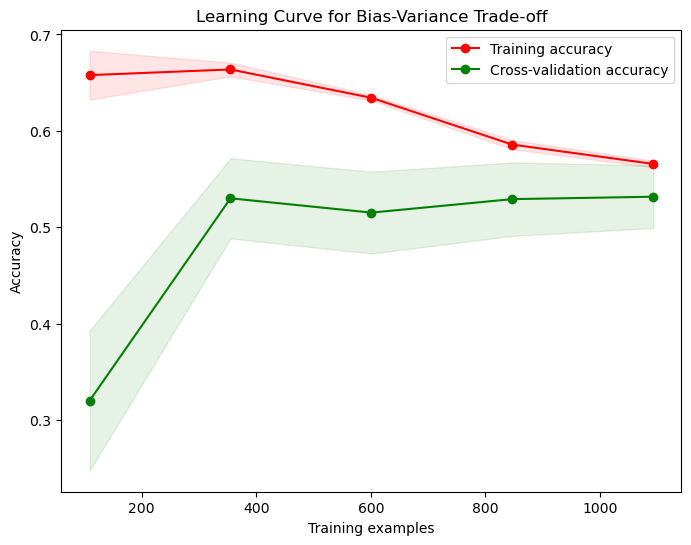

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Perform standard scaling on the entire feature set (X)
X_scaled = scaler.fit_transform(X_percentileSelected)

# Define model
model = RandomForestClassifier(
    n_estimators=34,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=2,
    random_state=42
)

# Set up K Fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an array of training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=kf, scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a plot
plt.figure(figsize=(8, 6))
plt.title("Learning Curve for Bias-Variance Trade-off")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

# Plot the mean training and test scores with a fill between them
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()

# 3 Clustering Approach
Goal: to predict the 'mean of nth-day prices' of a cluster

'GOOGL.csv' was used here for the classification approach.

## 3.1 Data Preprocessing

### Data Inspection & EDA

In [ ]:
# Create a copy dataset to preserve the original dataset
df_googl1 = df_googl.copy(deep=True)

In [ ]:
# Preview the df
df_googl1.head()

Date    Open    High     Low  Close(t)    Volume       SD20  \
0  2007-10-17  315.54  317.32  311.11    317.06  12048900  13.498014   
1  2007-10-18  318.02  321.01  314.56    320.13  24553800  13.603549   
2  2007-10-19  327.61  329.57  321.94    322.68  31546400  13.859332   
3  2007-10-22  319.65  327.83  318.46    325.70  13315400  14.319036   
4  2007-10-23  330.96  339.14  330.33    338.22  13573800  15.652638   

   Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  \
0  323.694527  269.702473        308.31        310.37        319.01   
1  326.077599  271.663401        317.06        308.31        310.37   
2  328.706664  273.269336        320.13        317.06        308.31   
3  331.696571  274.420429        322.68        320.13        317.06   
4  337.035777  274.425223        325.70        322.68        320.13   

   S_Close(t-5)  S_Open(t-1)      MA5     MA10      MA20      MA50      MA200  \
0        313.01       309.55  313.212  307.921  296.6985  273.7178  251.26115   
1        311.31       315.54  314.976  310.954  298.8705  274.8574  251.69165   
2        319.01       318.02  315.710  313.490  300.9880  276.1586  252.09570   
3        310.37       327.61  318.776  315.548  303.0585  277.5100  252.50500   
4        308.31       319.65  324.758  318.580  305.7305  279.1142  252.98595   

        EMA10       EMA20       EMA50      EMA100      EMA200       MACD  \
0  312.287152  312.287152  312.287152  312.287152  312.287152  12.171412   
1  314.901435  314.901435  314.901435  314.901435  314.901435  12.442187   
2  317.494290  317.494290  317.494290  317.494290  317.494290  12.715960   
3  320.229527  320.229527  320.229527  320.229527  320.229527  13.026455   
4  326.226351  326.226351  326.226351  326.226351  326.226351  14.120017   

    MACD_EMA       ATR        ADX          CCI        ROC        RSI  \
0  11.111101  7.045269  56.476330  1333.333333   8.470749  73.389836   
1  11.377318  7.002750  57.664488  1333.333333  10.465839  74.864389   
2  11.645046  7.176839  59.106975  1333.333333   8.529530  76.051464   
3  11.921328  7.333494  59.534640  1333.333333   6.744887  77.412023   
4  12.361066  7.769673  60.432318  1333.333333   9.847353  81.982111   

   William%R       SO%K      STD5   ForceIndex1  ForceIndex20    Date_col  \
0 -10.261049  89.738951  0.023374  1.054279e+08  5.224403e+08  2007-10-17   
1  -2.504174  97.495826  0.023019  7.538017e+07  1.066617e+09  2007-10-18   
2 -16.907975  83.092025  0.020676  8.044332e+07  1.335990e+09  2007-10-19   
3  -9.496933  90.503067  0.012440  4.021251e+07  5.513907e+08  2007-10-22   
4  -1.828299  98.171701  0.013849  1.699440e+08  7.253839e+08  2007-10-23   

   Day  DayofWeek  DayofYear  Week  Is_month_end  Is_month_start  \
0   17          2        290    42             0               0   
1   18          3        291    42             0               0   
2   19          4        292    42             0               0   
3   22          0        295    43             0               0   
4   23          1        296    43             0               0   

   Is_quarter_end  Is_quarter_start  Is_year_end  Is_year_start  Is_leap_year  \
0               0                 0            0              0             0   
1               0                 0            0              0             0   
2               0                 0            0              0             0   
3               0                 0            0              0             0   
4               0                 0            0              0             0   

   Year  Month  QQQ_Close  QQQ(t-1)  QQQ(t-2)  QQQ(t-5)  QQQ_MA10  QQQ_MA20  \
0  2007     10      47.56     46.95     47.18     47.52    47.102   46.2860   
1  2007     10      47.76     47.56     46.95     46.77    47.280   46.4535   
2  2007     10      46.57     47.76     47.56     47.54    47.246   46.5460   
3  2007     10      47.13     46.57     47.76     47.18    47.239   46.6560   
4  2007     10    

In [ ]:
# Shape of the df
df_googl1.shape

(3229, 64)

In [ ]:
# Column Names
df_googl1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [ ]:
# Summary info
df_googl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3229 non-null   object 
 1   Open              3229 non-null   float64
 2   High              3229 non-null   float64
 3   Low               3229 non-null   float64
 4   Close(t)          3229 non-null   float64
 5   Volume            3229 non-null   int64  
 6   SD20              3229 non-null   float64
 7   Upper_Band        3229 non-null   float64
 8   Lower_Band        3229 non-null   float64
 9   S_Close(t-1)      3229 non-null   float64
 10  S_Close(t-2)      3229 non-null   float64
 11  S_Close(t-3)      3229 non-null   float64
 12  S_Close(t-5)      3229 non-null   float64
 13  S_Open(t-1)       3229 non-null   float64
 14  MA5               3229 non-null   float64
 15  MA10              3229 non-null   float64
 16  MA20              3229 non-null   float64


In [ ]:
# Check the closing price columns
df_googl1[[ 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)']].head(5)

Close(t)  S_Close(t-1)  S_Close(t-2)  S_Close(t-3)  S_Close(t-5)
0    317.06        308.31        310.37        319.01        313.01
1    320.13        317.06        308.31        310.37        311.31
2    322.68        320.13        317.06        308.31        319.01
3    325.70        322.68        320.13        317.06        310.37
4    338.22        325.70        322.68        320.13        308.31

In [ ]:
# Check the closing price columns
df_googl1[[ 'Close(t)', 'Close_forcast']].tail(5)

Close(t)  Close_forcast
3224   1498.37        1496.82
3225   1496.82        1480.54
3226   1480.54        1507.24
3227   1507.24        1516.65
3228   1516.65        1504.63

In [ ]:
# Summary statistics
df_googl1.describe()

Open         High          Low     Close(t)        Volume  \
count  3229.000000  3229.000000  3229.000000  3229.000000  3.229000e+03   
mean    615.820059   621.492471   609.775621   615.836646  4.489683e+06   
std     373.529679   377.037479   370.134402   373.867807  4.244228e+06   
min     131.390000   134.820000   123.770000   128.850000  5.206000e+05   
25%     290.830000   293.400000   287.930000   290.580000  1.673800e+06   
50%     537.640000   541.950000   532.240000   537.760000  3.206700e+06   
75%     939.070000   944.080000   931.250000   938.080000  5.604100e+06   
max    1585.030000  1587.050000  1552.620000  1564.850000  4.652800e+07   

              SD20   Upper_Band   Lower_Band  S_Close(t-1)  S_Close(t-2)  \
count  3229.000000  3229.000000  3229.000000   3229.000000   3229.000000   
mean     15.845429   643.996784   580.615068    615.462431    615.091768   
std      13.565474   388.549262   353.775668    373.570491    373.279044   
min       2.385956   160.795478   120.186229    128.850000    128.850000   
25%       7.381170   307.811652   274.591811    290.580000    290.580000   
50%      11.375394   558.422072   512.251998    537.550000    537.510000   
75%      19.973213   957.583570   911.598582    937.820000    937.430000   
max     129.197311  1612.148227  1477.404581   1564.850000   1564.850000   

       S_Close(t-3)  S_Close(t-5)  S_Open(t-1)          MA5         MA10  \
count   3229.000000   3229.000000  3229.000000  3229.000000  3229.000000   
mean     614.732050    613.997807   615.448842   615.097560   614.180541   
std      373.004343    372.431865   373.238045   373.143178   372.297564   
min      128.850000    128.850000   131.390000   134.302000   137.208000   
25%      290.580000    290.580000   290.830000   289.906000   290.143000   
50%      537.310000    537.030000   537.500000   536.374000   537.273000   
75%      937.090000    936.860000   938.450000   937.914000   940.135000   
max     1564.850000   1564.850000  1585.030000  1543.642000  1532.402000   

              MA20         MA50        MA200        EMA10        EMA20  \
count  3229.000000  3229.000000  3229.000000  3229.000000  3229.000000   
mean    612.305926   606.626189   580.884467   615.097608   615.097608   
std     370.577641   365.512393   347.570981   373.081415   373.081415   
min     143.472500   150.373800   177.877250   135.358191   135.358191   
25%     289.325000   286.743400   281.100350   289.965603   289.965603   
50%     536.001000   536.684400   501.109250   536.766778   536.766778   
75%     937.408500   902.472000   836.201800   937.317422   937.317422   
max    1521.253000  1479.107600  1368.784300  1548.069870  1548.069870   

             EMA50       EMA100       EMA200         MACD     MACD_EMA  \
count  3229.000000  3229.000000  3229.000000  3229.000000  3229.000000   
mean    615.097608   615.097608   615.097608     2.628790     2.633332   
std     373.081415   373.081415   373.081415    12.162574    11.403351   
min     135.358191   135.358191   135.358191   -93.910532   -80.926347   
25%     289.965603   289.965603   289.965603    -3.271481    -3.155829   
50%     536.766778   536.766778   536.766778     2.519158     2.602215   
75%     937.317422   937.317422   937.317422     8.190294     7.938941   
max    1548.069870  1548.069870  1548.069870    43.297796    38.509205   

               ATR          ADX           CCI          ROC          RSI  \
count  3229.000000  3229.000000  3.229000e+03  3229.000000  3229.000000   
mean     12.825246    25.708020  1.333333e+03     0.645880    53.732822   
std       9.698040    10.053083  5.227559e-11     5.537955    12.653707   
min       3.438725     9.075975  1.333333e+03   -25.165894    21.322805   
25%       6.404628    18.094304  1.333333e+03    -2.159296    44.363796   
50%       9.523974    23.222649  1.333333e+03     0.754437    53.493187   
75%      15.823972    31.787004  1.333333e+03     3.824126    62.866892   
max      70.364123    69.488267  1

C:\Users\KaungHtetHein\AppData\Local\Temp\ipykernel_12100\162032658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_googl1.corr()


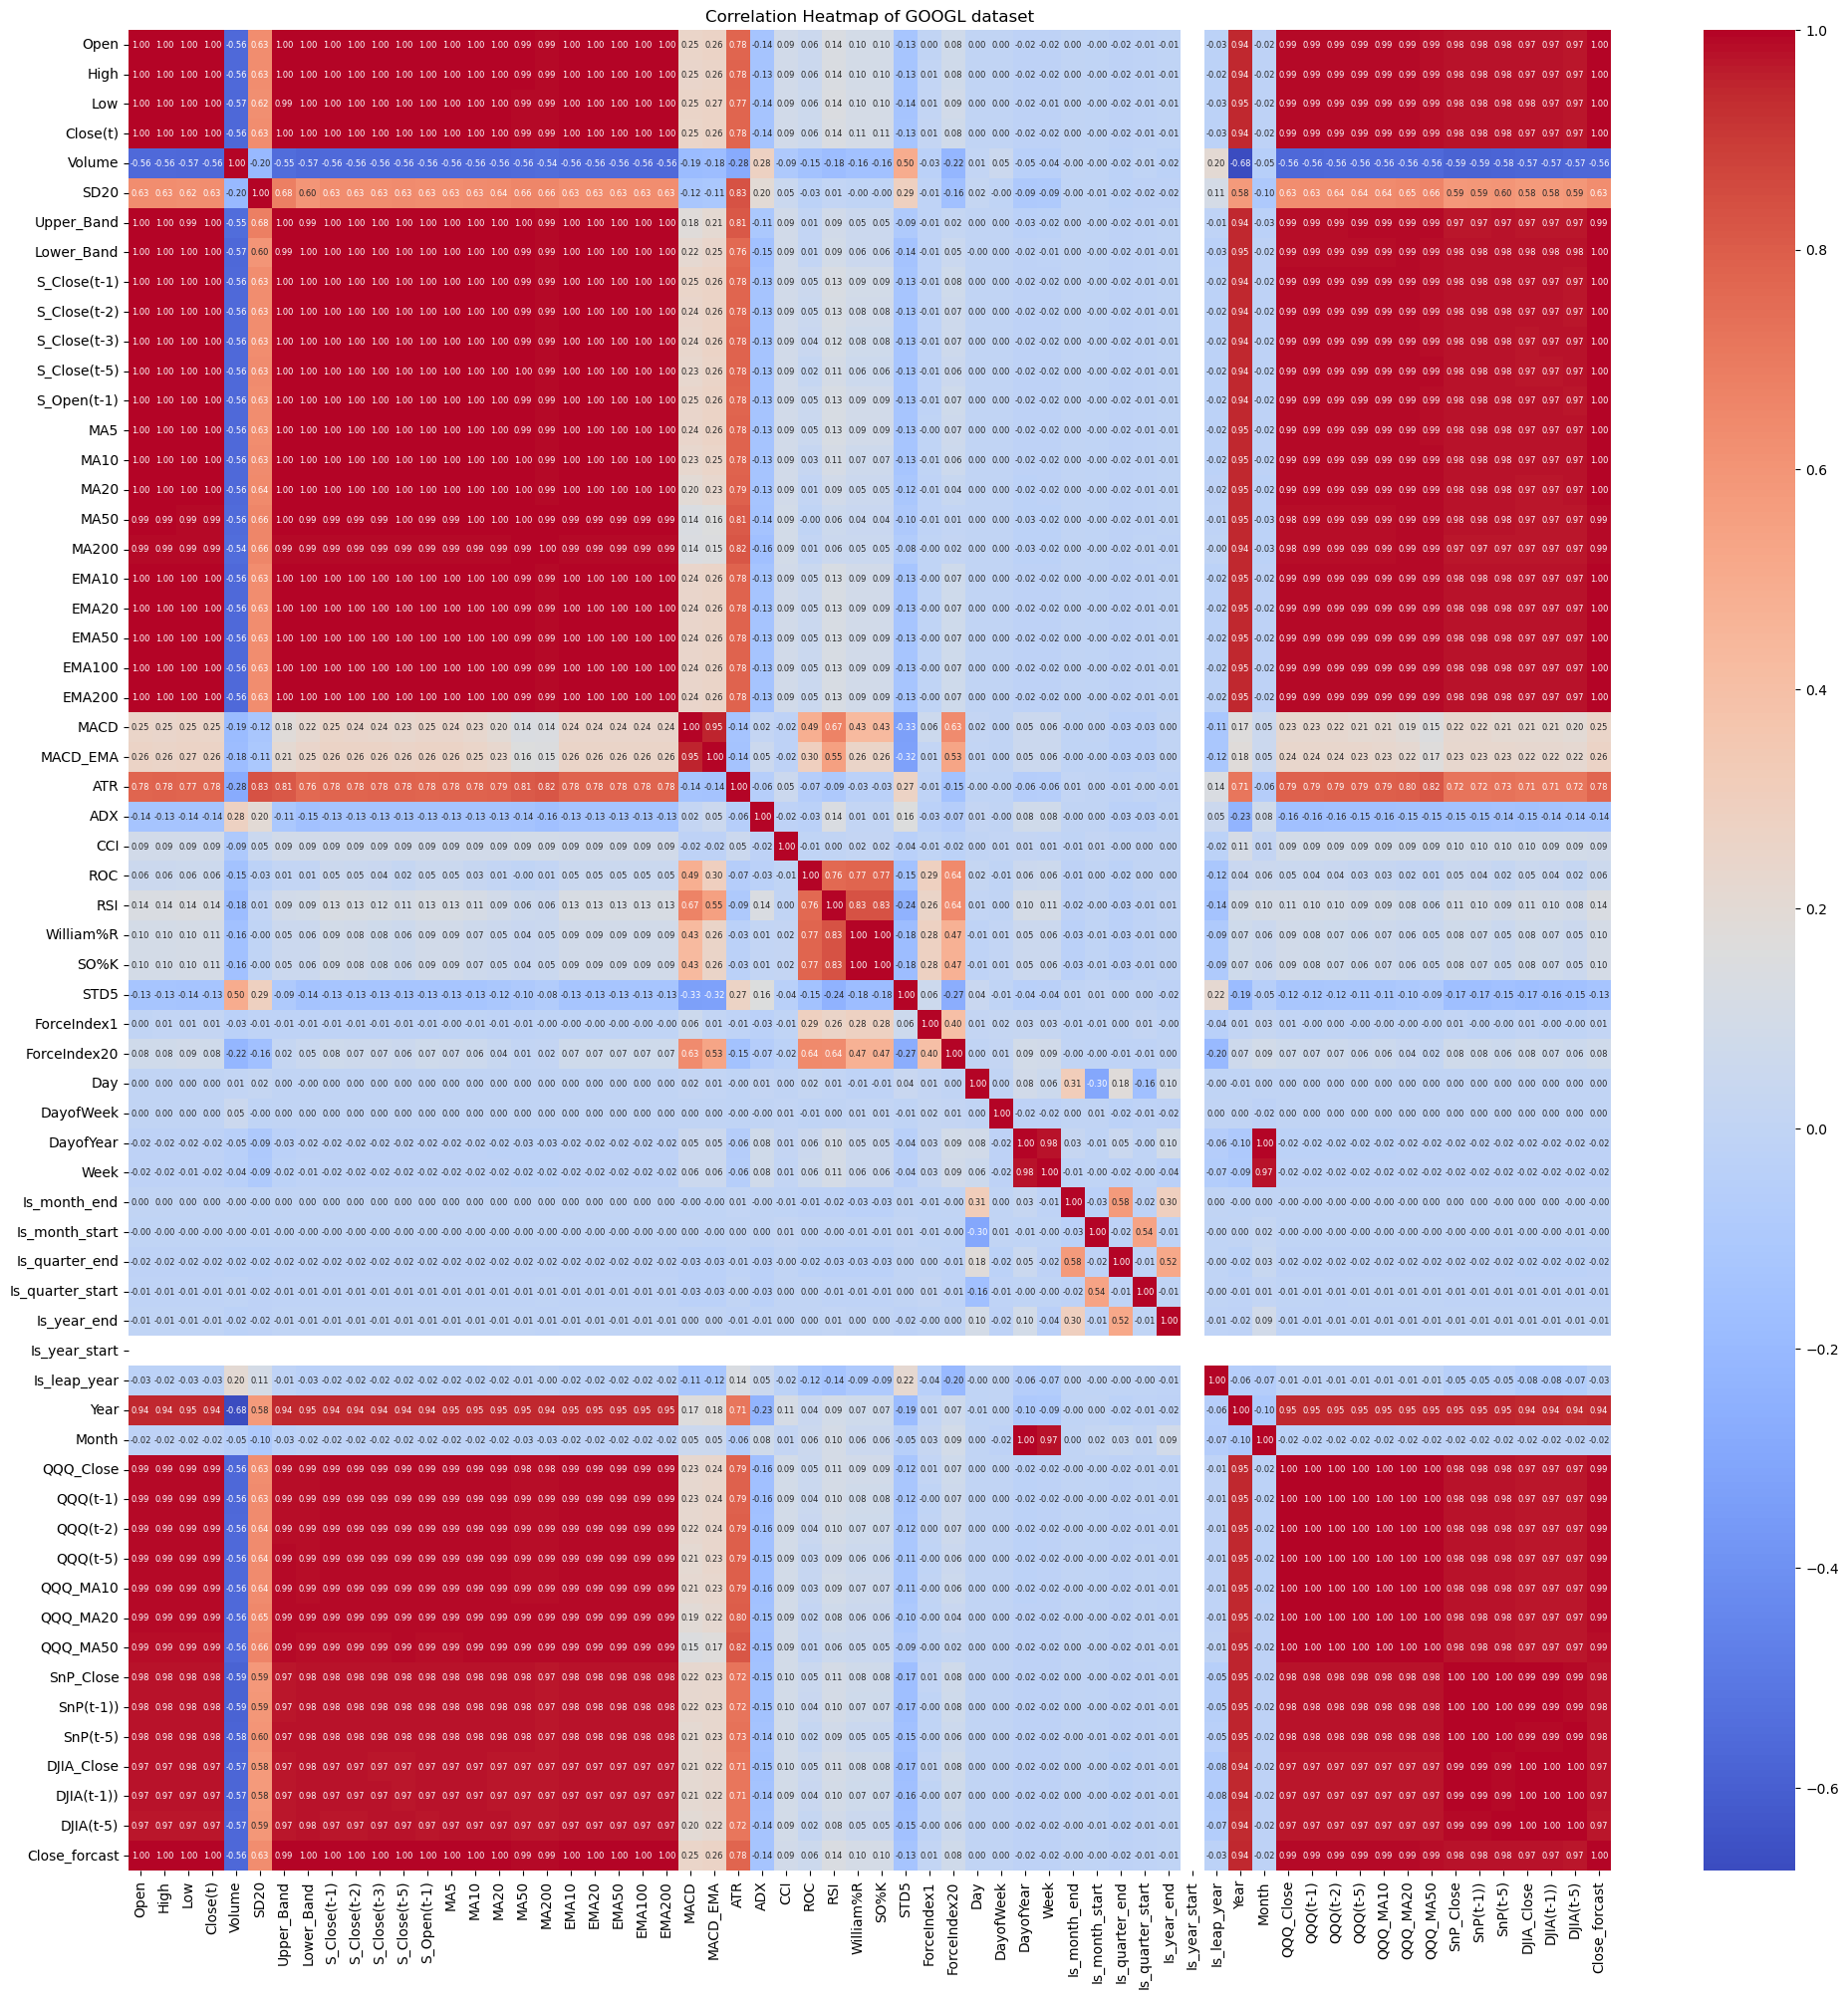

In [ ]:
# Correalation matrix heatmap
correlation_matrix = df_googl1.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size': 6})
plt.title('Correlation Heatmap of GOOGL dataset')
plt.show()

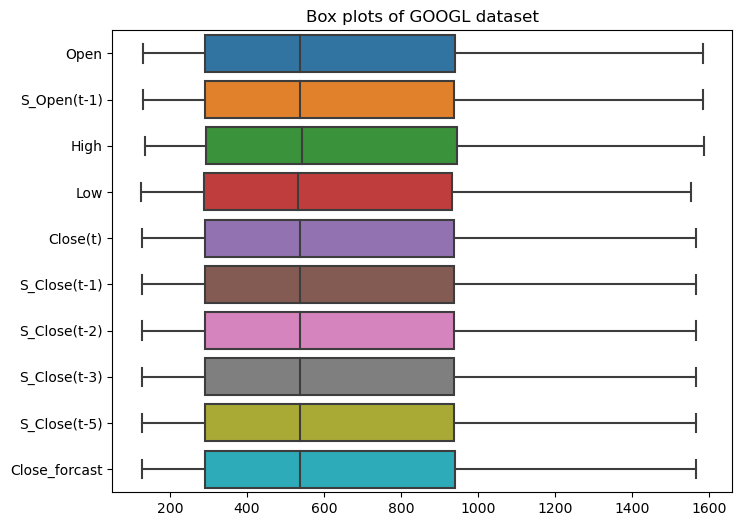

In [ ]:
# Create a box plot for the selected columns
features = ['Open', 'S_Open(t-1)', 'High', 'Low', 'Close(t)', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'Close_forcast']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_googl1[features], orient='h')
plt.title('Box plots of GOOGL dataset')
plt.show()

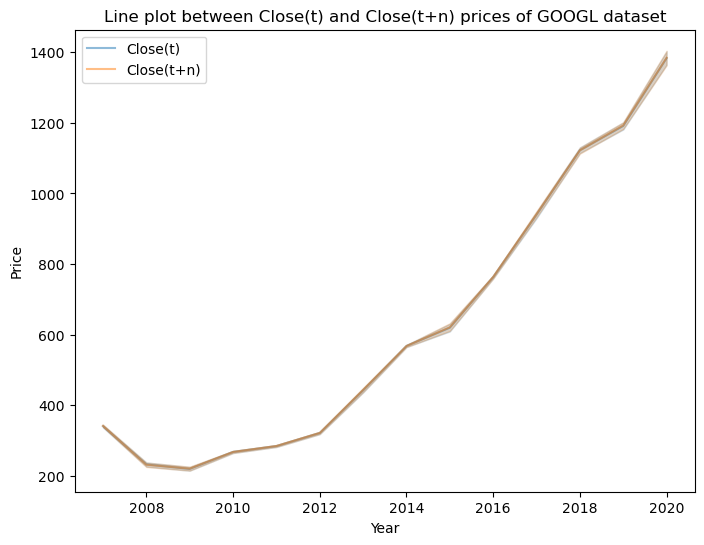

In [ ]:
# Create a line plot between Close(t) and Close(t+n) prices
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_googl1, x='Year', y='Close(t)', label='Close(t)', alpha=0.5)
sns.lineplot(data=df_googl1, x='Year', y='Close_forcast', label='Close(t+n)', alpha=0.5)

plt.title('Line plot between Close(t) and Close(t+n) prices of GOOGL dataset')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

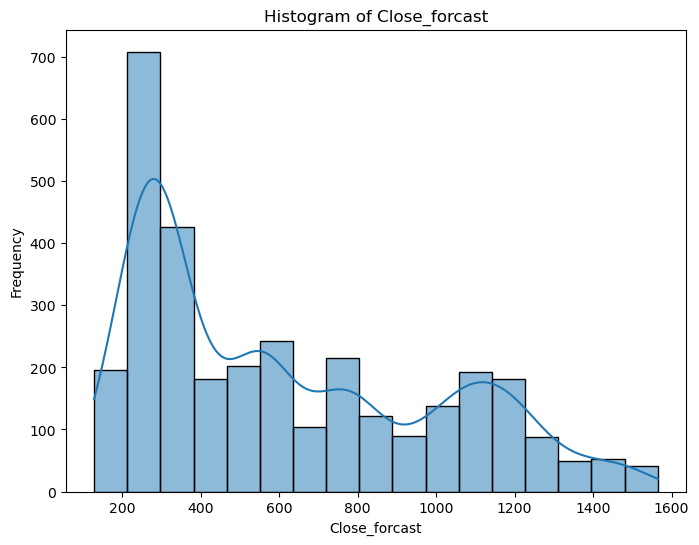

In [ ]:
# Create a histogram for the 'Close_forcast' column
plt.figure(figsize=(8, 6))
sns.histplot(df_googl1['Close_forcast'], kde=True)
plt.xlabel('Close_forcast')
plt.ylabel('Frequency')
plt.title('Histogram of Close_forcast')
plt.show()

Note: Close_forcast is not normally distributed.

### Data Cleaning

In [ ]:
# Identify the missing values
df_googl1.isna().sum().sum()

0

In [ ]:
# Identify the duplicate rows
df_googl1.duplicated().sum()

0

In [ ]:
# Check the datetime columns
df_googl1[['Date', 'Date_col', 'Day', 'Month', 'Year']].sample(5)

Date    Date_col  Day  Month  Year
1828  2015-01-22  2015-01-22   22      1  2015
743   2010-09-29  2010-09-29   29      9  2010
1241  2012-09-19  2012-09-19   19      9  2012
2311  2016-12-20  2016-12-20   20     12  2016
1377  2013-04-09  2013-04-09    9      4  2013

In [ ]:
# Drop date columns
df_googl1.drop(['Date', 'Date_col'], axis=1, inplace=True)
df_googl1.shape

(3229, 62)

Note: Date and Date_col were irrelevant to this analysis so, they were dropped.

### Data Splitting

In [ ]:
# Split target and features
X = df_googl1.drop(['Close_forcast'], axis=1)
y = df_googl1['Close_forcast']

## 3.2 Feature Engineering

### Feature Scaling

In [ ]:
# Initialize the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

results = {}

# Specify the number of clusters (K)
n_clusters = 3

for scaler_name, scaler in scalers.items():
    # Apply the scaler to the data
    X_scaled = scaler.fit_transform(X)

    # Create and fit a K-Means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Get cluster labels
    cluster_labels = kmeans.predict(X_scaled)

    # Calculate performance
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

    results[scaler_name] = {
        "Silhouette Score": silhouette_avg,
        "Davies-Bouldin Index": davies_bouldin,
    }

# Print results
for scaler_name, metrics in results.items():
    print(f"Scaler: {scaler_name}")
    print(f"Silhouette Score: {metrics['Silhouette Score']:.6f}")
    print(f"Davies-Bouldin Index: {metrics['Davies-Bouldin Index']:.6f}")
    print('\n')

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Scaler: StandardScaler
Silhouette Score: 0.273861
Davies-Bouldin Index: 1.317742


Scaler: MinMaxScaler
Silhouette Score: 0.272466
Davies-Bouldin Index: 1.373990


Scaler: RobustScaler
Silhouette Score: 0.339769
Davies-Bouldin Index: 0.941021




### Feature Selection using Variance Threshold

In [ ]:
# Initialize the VarianceThreshold with a threshold
threshold = 0.1
selector = VarianceThreshold(threshold)

# Fit the selector
selector.fit(X)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names and their count from the DataFrame
selected_feature_names = X.columns[selected_indices]
selected_feature_count = len(selected_indices)

# Print the selected feature names, their indices, and count
print("Selected Feature Indices:")
print(selected_indices)
print("Selected Feature Names:")
print(selected_feature_names)
print("Number of Selected Features:", selected_feature_count)

Selected Feature Indices:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 33 34 35 36 37 38 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60]
Selected Feature Names:
Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'ROC', 'RSI', 'William%R', 'SO%K', 'ForceIndex1',
       'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)'],
      dtype='object')
Number of Selected Features: 53


In [ ]:
X_vtSelected = X[selected_feature_names]
X_vtSelected.shape

(3229, 53)

### Checking performance on K Means Clustering with features selected from Variance Threshold

In [ ]:
# Initialize and apply the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_vtSelected)

# Specify the number of clusters (K)
n_clusters = 3

# Create and fit a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Calculate performance
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette_avg:.6f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.6f}")

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.356408
Davies-Bouldin Index: 0.906047


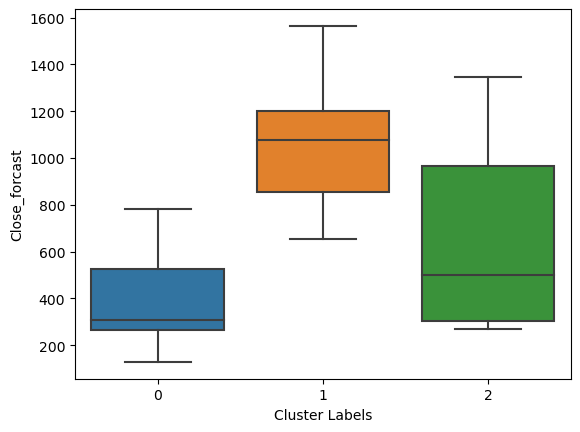

In [ ]:
# View a distribution of stock values using a boxplot
sns.boxplot(x=cluster_labels, y=y)
plt.xlabel('Cluster Labels')
plt.ylabel('Close_forcast')
plt.show()

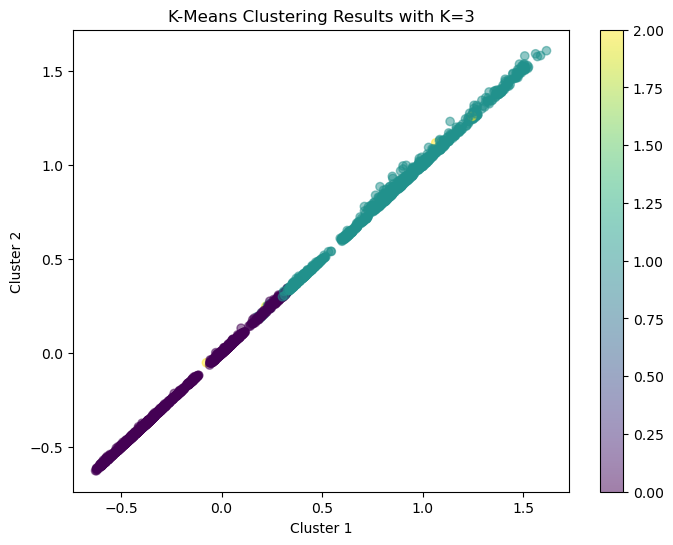

In [ ]:
# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering Results with K=3")
plt.xlabel('Cluster 1')
plt.ylabel('Cluster 2')
plt.colorbar()
plt.show()

### Dimension Reduction using Principal Component Analysis (PCA)

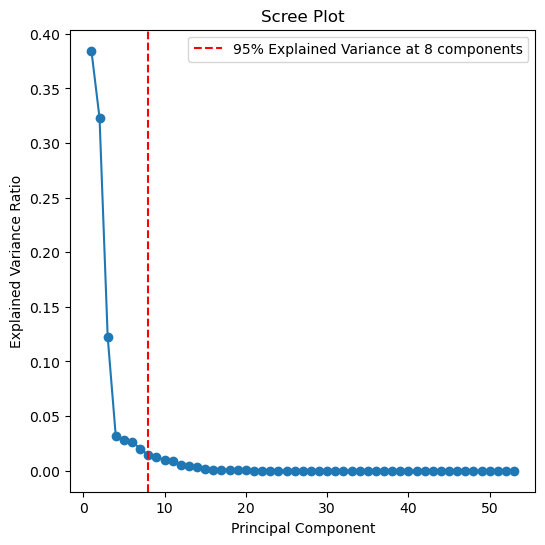

Number of components explaining at least 95.0% of the variance: 8


In [ ]:
# Initialize and apply the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_vtSelected)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

# Create a scree plot
plt.figure(figsize=(6, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Mark the "elbow" point on the plot
plt.axvline(x=num_components, color='red', linestyle='--', label=f'95% Explained Variance at {num_components} components')
plt.legend()

# Show the scree plot
plt.show()

# Display the number of components
print(f'Number of components explaining at least {threshold * 100}% of the variance: {num_components}')

In [ ]:
#Apply PCA for dimensionality reduction
pca = PCA(n_components=8)  # Select number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.38450897 0.32298997 0.1227985  0.03134574 0.02856361 0.02645285
 0.0202377  0.01425477]


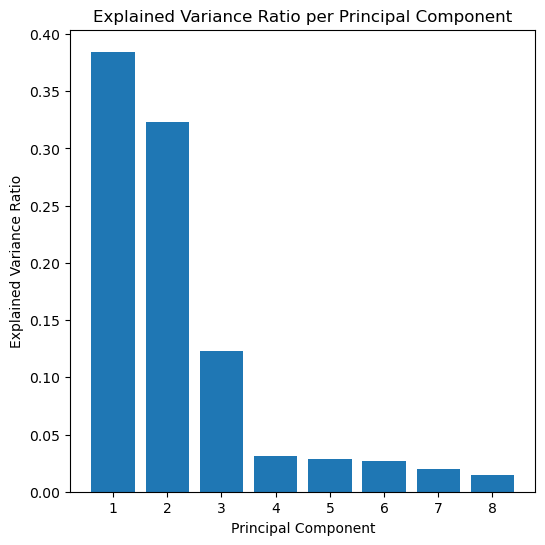

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(range(1, 9), explained_variance_ratio, align="center")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()

### Checking performance on K Means Clustering with PCA data

In [ ]:
# Initialize and apply the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_pca)

# Specify the number of clusters (K)
n_clusters = 3

# Create and fit a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# G cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Calculate performance on the testing data
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette_avg:.6f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.6f}")

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.660737
Davies-Bouldin Index: 0.740817


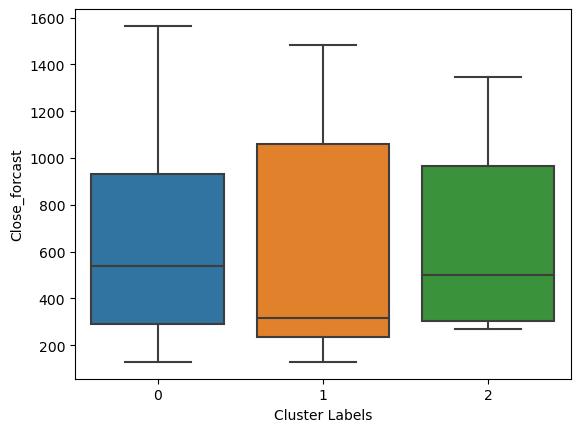

In [ ]:
# View a distribution of stock values using a boxplot
sns.boxplot(x=cluster_labels, y=y)
plt.xlabel('Cluster Labels')
plt.ylabel('Close_forcast')
plt.show()

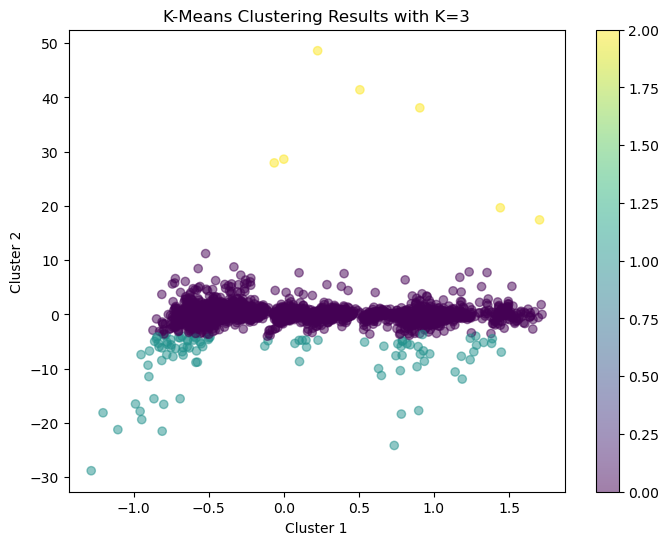

In [ ]:
# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering Results with K=3")
plt.xlabel('Cluster 1')
plt.ylabel('Cluster 2')
plt.colorbar()
plt.show()

## 3.3 Model Selection

### Choosing Optimal K Value using Elbow Curve

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.

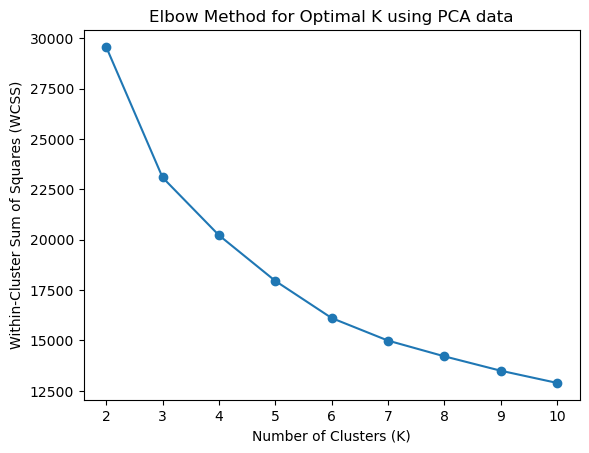

In [ ]:
# Initialize and apply it the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_pca)

# Define a range of K values
k_values = range(2, 11)
wcss = []

# Fit K-means for each K and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K using PCA data')
plt.show()

### Choosing Optimal K Value using Silhouette Score

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.

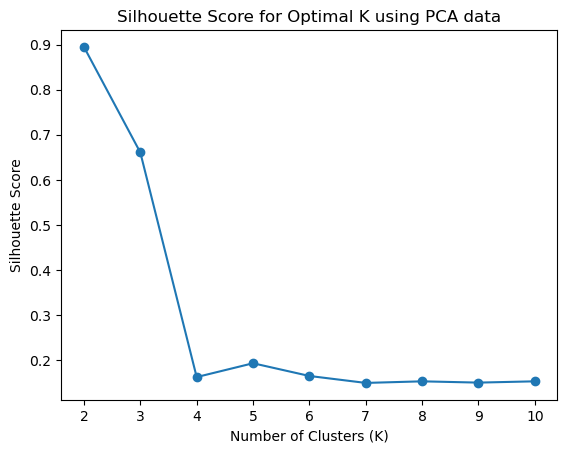

Optimal number of clusters (K): 2


In [ ]:
# Initialize and apply it the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_pca)

# Define a range of K values
k_values = range(2, 11)
silhouette_scores = []

# Calculate the Silhouette Score for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K using PCA data')
plt.show()

# Identify the K value with the highest Silhouette Score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (K): {optimal_k}')

### Hyper-parameter tuning for K Means Clustering

In [ ]:
# Initialize and apply it the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_pca)

# Define a range of hyperparameter values to search
n_clusters_range = [2, 3, 4, 5]
init_methods = ['k-means++', 'random']
n_init_values = [1, 10, 20, 30]
max_iter_values = [100, 200, 300, 500]

best_score = -1  # Initialize with a low value
best_params = None
best_davies_bouldin = float('inf')  # Initialize with a high value

for n_clusters in n_clusters_range:
    for init in init_methods:
        for n_init in n_init_values:
            for max_iter in max_iter_values:
                # Create a K-Means estimator with the current hyperparameters
                kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                kmeans.fit(X_scaled)

                # Predict cluster labels
                cluster_labels = kmeans.predict(X_scaled)

                # Calculate the Silhouette Score
                silhouette_score_value = silhouette_score(X_scaled, cluster_labels)

                # Calculate the Davies-Bouldin Index
                davies_bouldin_value = davies_bouldin_score(X_scaled, cluster_labels)

                # Update best hyperparameters if the current score is higher and Davies-Bouldin is lower
                if silhouette_score_value > best_score and davies_bouldin_value < best_davies_bouldin:
                    best_score = silhouette_score_value
                    best_davies_bouldin = davies_bouldin_value
                    best_params = {
                        'n_clusters': n_clusters,
                        'init': init,
                        'n_init': n_init,
                        'max_iter': max_iter,
                        'random_state': 42
                    }

# Train a K-Means model with the best hyperparameters on the entire training dataset
best_kmeans = KMeans(**best_params)
best_kmeans.fit(X_scaled)

# Print the best hyperparameters, Silhouette Score, and Davies-Bouldin Index
print("Best Hyperparameters:", best_params)
print(f"Best Silhouette Score: {best_score:.6f}")
print(f"Best Davies-Bouldin Index: {best_davies_bouldin:.6f}")

Best Hyperparameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100, 'random_state': 42}
Best Silhouette Score: 0.894977
Best Davies-Bouldin Index: 0.380072


## 3.4 Evaluation

### Performance of K Means Clustering with Best Hyper-Parameters

In [ ]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the RobustScaler to the data
X_scaled = scaler.fit_transform(X_pca)

# Create a K-Means estimator with the current hyperparameters
best_kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = best_kmeans.predict(X_scaled)

# Calculate performance on the testing data
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

# Print the results
print(f"Silhouette Score: {silhouette_avg:.6f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.6f}")

Silhouette Score: 0.894977
Davies-Bouldin Index: 0.380072


### Predicting the mean of nth-day prices of a cluster

In [ ]:
# Add the cluster labels to the DataFrame
df_googl1['Cluster'] = cluster_labels

# Calculate the mean of 'Close_Forcast' for each cluster
cluster_means = df_googl1.groupby('Cluster')['Close_forcast'].mean()
print(cluster_means)

Cluster
0    616.096983
1    665.660000
Name: Close_forcast, dtype: float64


### Visualizations

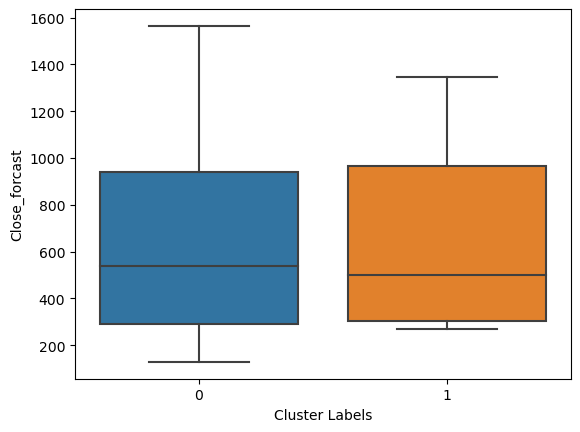

In [ ]:
# View a distribution of stock values using a boxplot
sns.boxplot(x=cluster_labels, y=y)
plt.xlabel('Cluster Labels')
plt.ylabel('Close_forcast')
plt.show()

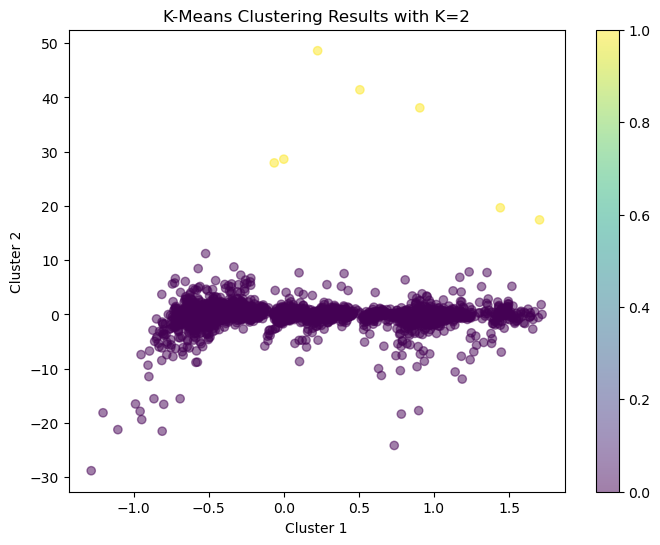

In [ ]:
# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering Results with K=2")
plt.xlabel('Cluster 1')
plt.ylabel('Cluster 2')
plt.colorbar()
plt.show()

###  Bootstrap Subsampling

In [ ]:
# Initialize and apply it the RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_pca)

# Define the number of bootstrap iterations
n_iterations = 100

# Initialize lists to store Silhouette Scores and Davies-Bouldin Indices
silhouette_scores = []
davies_bouldin_indices = []

for _ in range(n_iterations):
    # Set a fixed random seed
    np.random.seed(42)

    # Perform bootstrapping
    indices = np.random.choice(len(X_scaled), size=len(X_scaled), replace=False)
    X_bootstrap = X_scaled[indices]

    # Create a K-Means estimator with the best hyperparameters
    best_kmeans.fit(X_bootstrap)

    # Get cluster labels
    cluster_labels = best_kmeans.predict(X_bootstrap)

    # Calculate Silhouette Score and Davies-Bouldin Index
    silhouette_avg = silhouette_score(X_bootstrap, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_bootstrap, cluster_labels)

    # Append the results to the lists
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_indices.append(davies_bouldin)

# Calculate the average metrics over all iterations
average_silhouette_score = np.mean(silhouette_scores)
average_davies_bouldin_index = np.mean(davies_bouldin_indices)

# Print the results
print(f"Average Silhouette Score: {average_silhouette_score:.6f}")
print(f"Average Davies-Bouldin Index: {average_davies_bouldin_index:.6f}")

Average Silhouette Score: 0.894977
Average Davies-Bouldin Index: 0.380072


### Predicting the mean of nth-day prices of a cluster after Bootstapping

In [ ]:
# Add the cluster labels to the DataFrame
df_googl1['Cluster'] = cluster_labels

# Calculate the mean of 'Close_Forcast' for each cluster
cluster_means = df_googl1.groupby('Cluster')['Close_forcast'].mean()
print(cluster_means)

Cluster
0    616.381403
1    534.745714
Name: Close_forcast, dtype: float64


### Visualizations after Bootstrapping

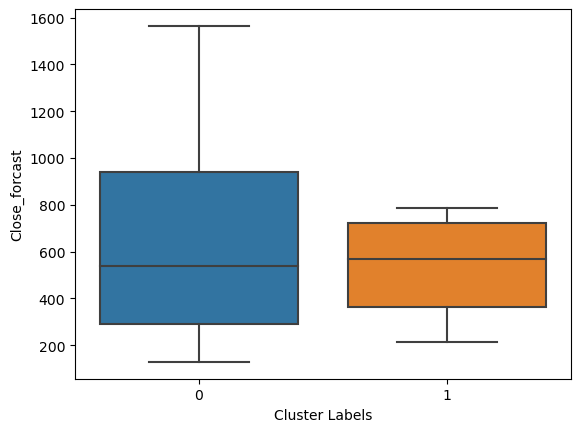

In [ ]:
# View a distribution of stock values using a boxplot
sns.boxplot(x=cluster_labels, y=y)
plt.xlabel('Cluster Labels')
plt.ylabel('Close_forcast')
plt.show()

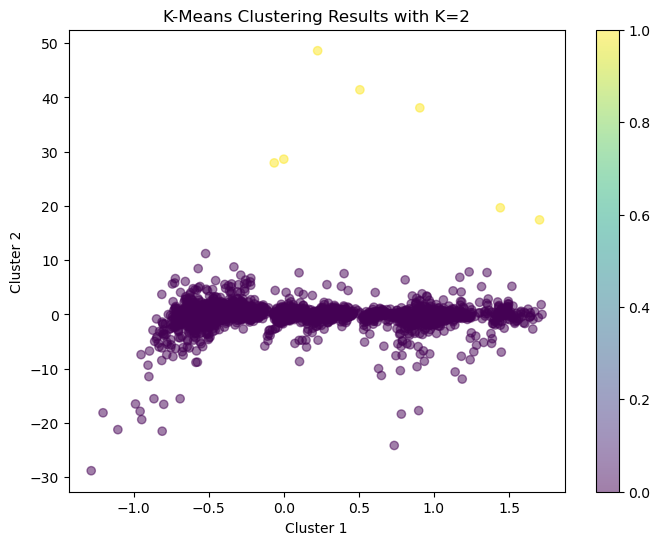

In [ ]:
# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_bootstrap[:, 0], X_bootstrap[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering Results with K=2")
plt.xlabel('Cluster 1')
plt.ylabel('Cluster 2')
plt.colorbar()
plt.show()